In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

plt.rcParams.update({"font.size": 10})
plt.rcParams.update({"figure.figsize": (30, 20)})
plt.rcParams["figure.constrained_layout.use"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.7
plt.rcParams["grid.color"] = "#cccccc"

plt.rcParams["axes.prop_cycle"] = plt.cycler(
    color=["#009392", "#39B185", "#9CCB86", "#E9E29C", "#EEB479", "#E88471", "#CF597E"]
)

sns.set_context(
    "paper", font_scale=4, rc={"lines.linewidth": 5, "figure.figsize": (16, 9)}
)

In [2]:
market_df = pd.read_csv('market_data.csv')
market_df.head()

Date  EURUSD_Spot_ASK  EURUSD_Spot_BID  EURUSD_Spot_MID  \
0  2019-12-31           1.1217           1.1208          1.12126   
1  2020-01-01           1.1217           1.1207          1.12121   
2  2020-01-02           1.1174           1.1171          1.11725   
3  2020-01-03           1.1171           1.1150          1.11606   
4  2020-01-06           1.1199           1.1196          1.11972   

   EURUSD_1Y_ATM_VOL_ASK  EURUSD_1Y_ATM_VOL_BID  EURUSD_1Y_ATM_VOL_MID  \
0                  5.970                  5.570                  5.770   
1                  5.960                  5.560                  5.760   
2                  5.845                  5.645                  5.745   
3                  5.890                  5.690                  5.790   
4                  5.875                  5.675                  5.775   

   EURUSD_1Y_25DELTA_Risk_Reversal_ASK  EURUSD_1Y_25DELTA_Risk_Reversal_BID  \
0                                0.555                                0.275   
1                                0.550                                0.270   
2                                0.435                                0.295   
3                                0.430                                0.290   
4                                0.425                                0.285   

   EURUSD_1Y_25DELTA_Risk_Reversal_MID  ...  EURUSD_1Y_25DELTA_Butterfly_MID  \
0                                0.415  ...                            0.245   
1                                0.410  ...                            0.245   
2                                0.365  ...                            0.245   
3                                0.360  ...                            0.245   
4                                0.355  ...                            0.245   

   EURUSD_5Y_ATM_VOL_ASK  EURUSD_5Y_ATM_VOL_BID  EURUSD_5Y_ATM_VOL_MID  \
0                  7.405                  6.925                 7.1650   
1                  7.395                  6.915                 7.1550   
2                  7.250                  7.010                 7.1300   
3                  7.290                  7.010                 7.1500   
4                  7.315                  7.060                 7.1875   

   EURUSD_5Y_25DELTA_Risk_Reversal_ASK  EURUSD_5Y_25DELTA_Risk_Reversal_BID  \
0                                0.380                                0.045   
1                                0.385                                0.050   
2                                0.225                                0.060   
3                                0.210                                0.010   
4                                0.185                                0.010   

   EURUSD_5Y_25DELTA_Risk_Reversal_MID  EURUSD_5Y_25DELTA_Butterfly_ASK  \
0                               0.2125                            0.400   
1                               0.2175                            0.400   
2                               0.1425                            0.340   
3                               0.1100                            0.355   
4                               0.0975                            0.350   

   EURUSD_5Y_25DELTA_Butterfly_BID  EURUSD_5Y_25DELTA_Butterfly_MID  
0                            0.160                           0.2800  
1                            0.160                           0.2800  
2                            0.220                           0.2800  
3                            0.210                           0.2825  
4                            0.225                           0.2875  

[5 rows x 22 columns]

In [3]:
market_df['Date'] = pd.to_datetime(market_df['Date'])
market_df.set_index('Date', inplace=True)
market_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1459 entries, 2019-12-31 to 2025-08-01
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EURUSD_Spot_ASK                      1459 non-null   float64
 1   EURUSD_Spot_BID                      1459 non-null   float64
 2   EURUSD_Spot_MID                      1459 non-null   float64
 3   EURUSD_1Y_ATM_VOL_ASK                1459 non-null   float64
 4   EURUSD_1Y_ATM_VOL_BID                1459 non-null   float64
 5   EURUSD_1Y_ATM_VOL_MID                1459 non-null   float64
 6   EURUSD_1Y_25DELTA_Risk_Reversal_ASK  1459 non-null   float64
 7   EURUSD_1Y_25DELTA_Risk_Reversal_BID  1459 non-null   float64
 8   EURUSD_1Y_25DELTA_Risk_Reversal_MID  1459 non-null   float64
 9   EURUSD_1Y_25DELTA_Butterfly_ASK      1459 non-null   float64
 10  EURUSD_1Y_25DELTA_Butterfly_BID      1459 non-null   float64
 11  EURUSD_1Y_25

In [4]:
market_df.describe()

EURUSD_Spot_ASK  EURUSD_Spot_BID  EURUSD_Spot_MID  \
count      1459.000000      1459.000000      1459.000000   
mean          1.108385         1.107732         1.108059   
std           0.057349         0.057400         0.057373   
min           0.959600         0.959200         0.959390   
25%           1.072800         1.072400         1.072545   
50%           1.094900         1.094300         1.094750   
75%           1.155750         1.155100         1.155330   
max           1.233000         1.232300         1.232660   

       EURUSD_1Y_ATM_VOL_ASK  EURUSD_1Y_ATM_VOL_BID  EURUSD_1Y_ATM_VOL_MID  \
count            1459.000000            1459.000000            1459.000000   
mean                7.287718               7.041230               7.164474   
std                 1.187788               1.151716               1.168606   
min                 5.065000               4.865000               4.965000   
25%                 6.445000               6.230000               6.340000   
50%                 7.050000               6.825000               6.940000   
75%                 7.855000               7.605000               7.742500   
max                12.450000              11.170000              11.600000   

       EURUSD_1Y_25DELTA_Risk_Reversal_ASK  \
count                          1459.000000   
mean                             -0.621323   
std                               0.796111   
min                              -2.665000   
25%                              -1.125000   
50%                              -0.745000   
75%                              -0.150000   
max                               1.810000   

       EURUSD_1Y_25DELTA_Risk_Reversal_BID  \
count                          1459.000000   
mean                             -0.793794   
std                               0.795910   
min                              -3.035000   
25%                              -1.320000   
50%                              -0.900000   
75%                              -0.300000   
max                               1.320000   

       EURUSD_1Y_25DELTA_Risk_Reversal_MID  EURUSD_1Y_25DELTA_Butterfly_ASK  \
count                          1459.000000                      1459.000000   
mean                             -0.707560                         0.392687   
std                               0.795083                         0.119546   
min                              -2.770000                         0.250000   
25%                              -1.212500                         0.320000   
50%                              -0.820000                         0.370000   
75%                              -0.222500                         0.435000   
max                               1.565000                         1.705000   

       ...  EURUSD_1Y_25DELTA_Butterfly_MID  EURUSD_5Y_ATM_VOL_ASK  \
count  ...                      1459.000000            1459.000000   
mean   ...                         0.331038               8.363465   
std    ...                         0.098259               0.990486   
min    ...                         0.205000               6.815000   
25%    ...                         0.267500               7.662500   
50%    ...                         0.315000               8.170000   
75%    ...                         0.370000               8.775000   
max    ...                         1.280000              12.690000   

       EURUSD_5Y_ATM_VOL_BID  EURUSD_5Y_ATM_VOL_MID  \
count            1459.000000            1459.000000   
mean                7.913787               8.138626   
std                 0.933200               0.957544   
min                 6.535000               6.680000   
25%                 7.260000               7.467500   
50%                 7.725000               7.960000   
75%                 8.282500               8.536250   
max                11.550000              11.840000   

       EURUSD_5Y_25DELTA_Risk_Reversal_ASK  \
count                          1459.000000   
me

In [5]:
market_df.columns

Index(['EURUSD_Spot_ASK', 'EURUSD_Spot_BID', 'EURUSD_Spot_MID',
       'EURUSD_1Y_ATM_VOL_ASK', 'EURUSD_1Y_ATM_VOL_BID',
       'EURUSD_1Y_ATM_VOL_MID', 'EURUSD_1Y_25DELTA_Risk_Reversal_ASK',
       'EURUSD_1Y_25DELTA_Risk_Reversal_BID',
       'EURUSD_1Y_25DELTA_Risk_Reversal_MID',
       'EURUSD_1Y_25DELTA_Butterfly_ASK', 'EURUSD_1Y_25DELTA_Butterfly_BID',
       'EURUSD_1Y_25DELTA_Butterfly_MID', 'EURUSD_5Y_ATM_VOL_ASK',
       'EURUSD_5Y_ATM_VOL_BID', 'EURUSD_5Y_ATM_VOL_MID',
       'EURUSD_5Y_25DELTA_Risk_Reversal_ASK',
       'EURUSD_5Y_25DELTA_Risk_Reversal_BID',
       'EURUSD_5Y_25DELTA_Risk_Reversal_MID',
       'EURUSD_5Y_25DELTA_Butterfly_ASK', 'EURUSD_5Y_25DELTA_Butterfly_BID',
       'EURUSD_5Y_25DELTA_Butterfly_MID'],
      dtype='object')

In [6]:
print(F"Dates: [{market_df.index.min()}] to [{market_df.index.max()}]")

Dates: [2019-12-31 00:00:00] to [2025-08-01 00:00:00]


# Historical Behaviour of EURUSD

## Spot Rate

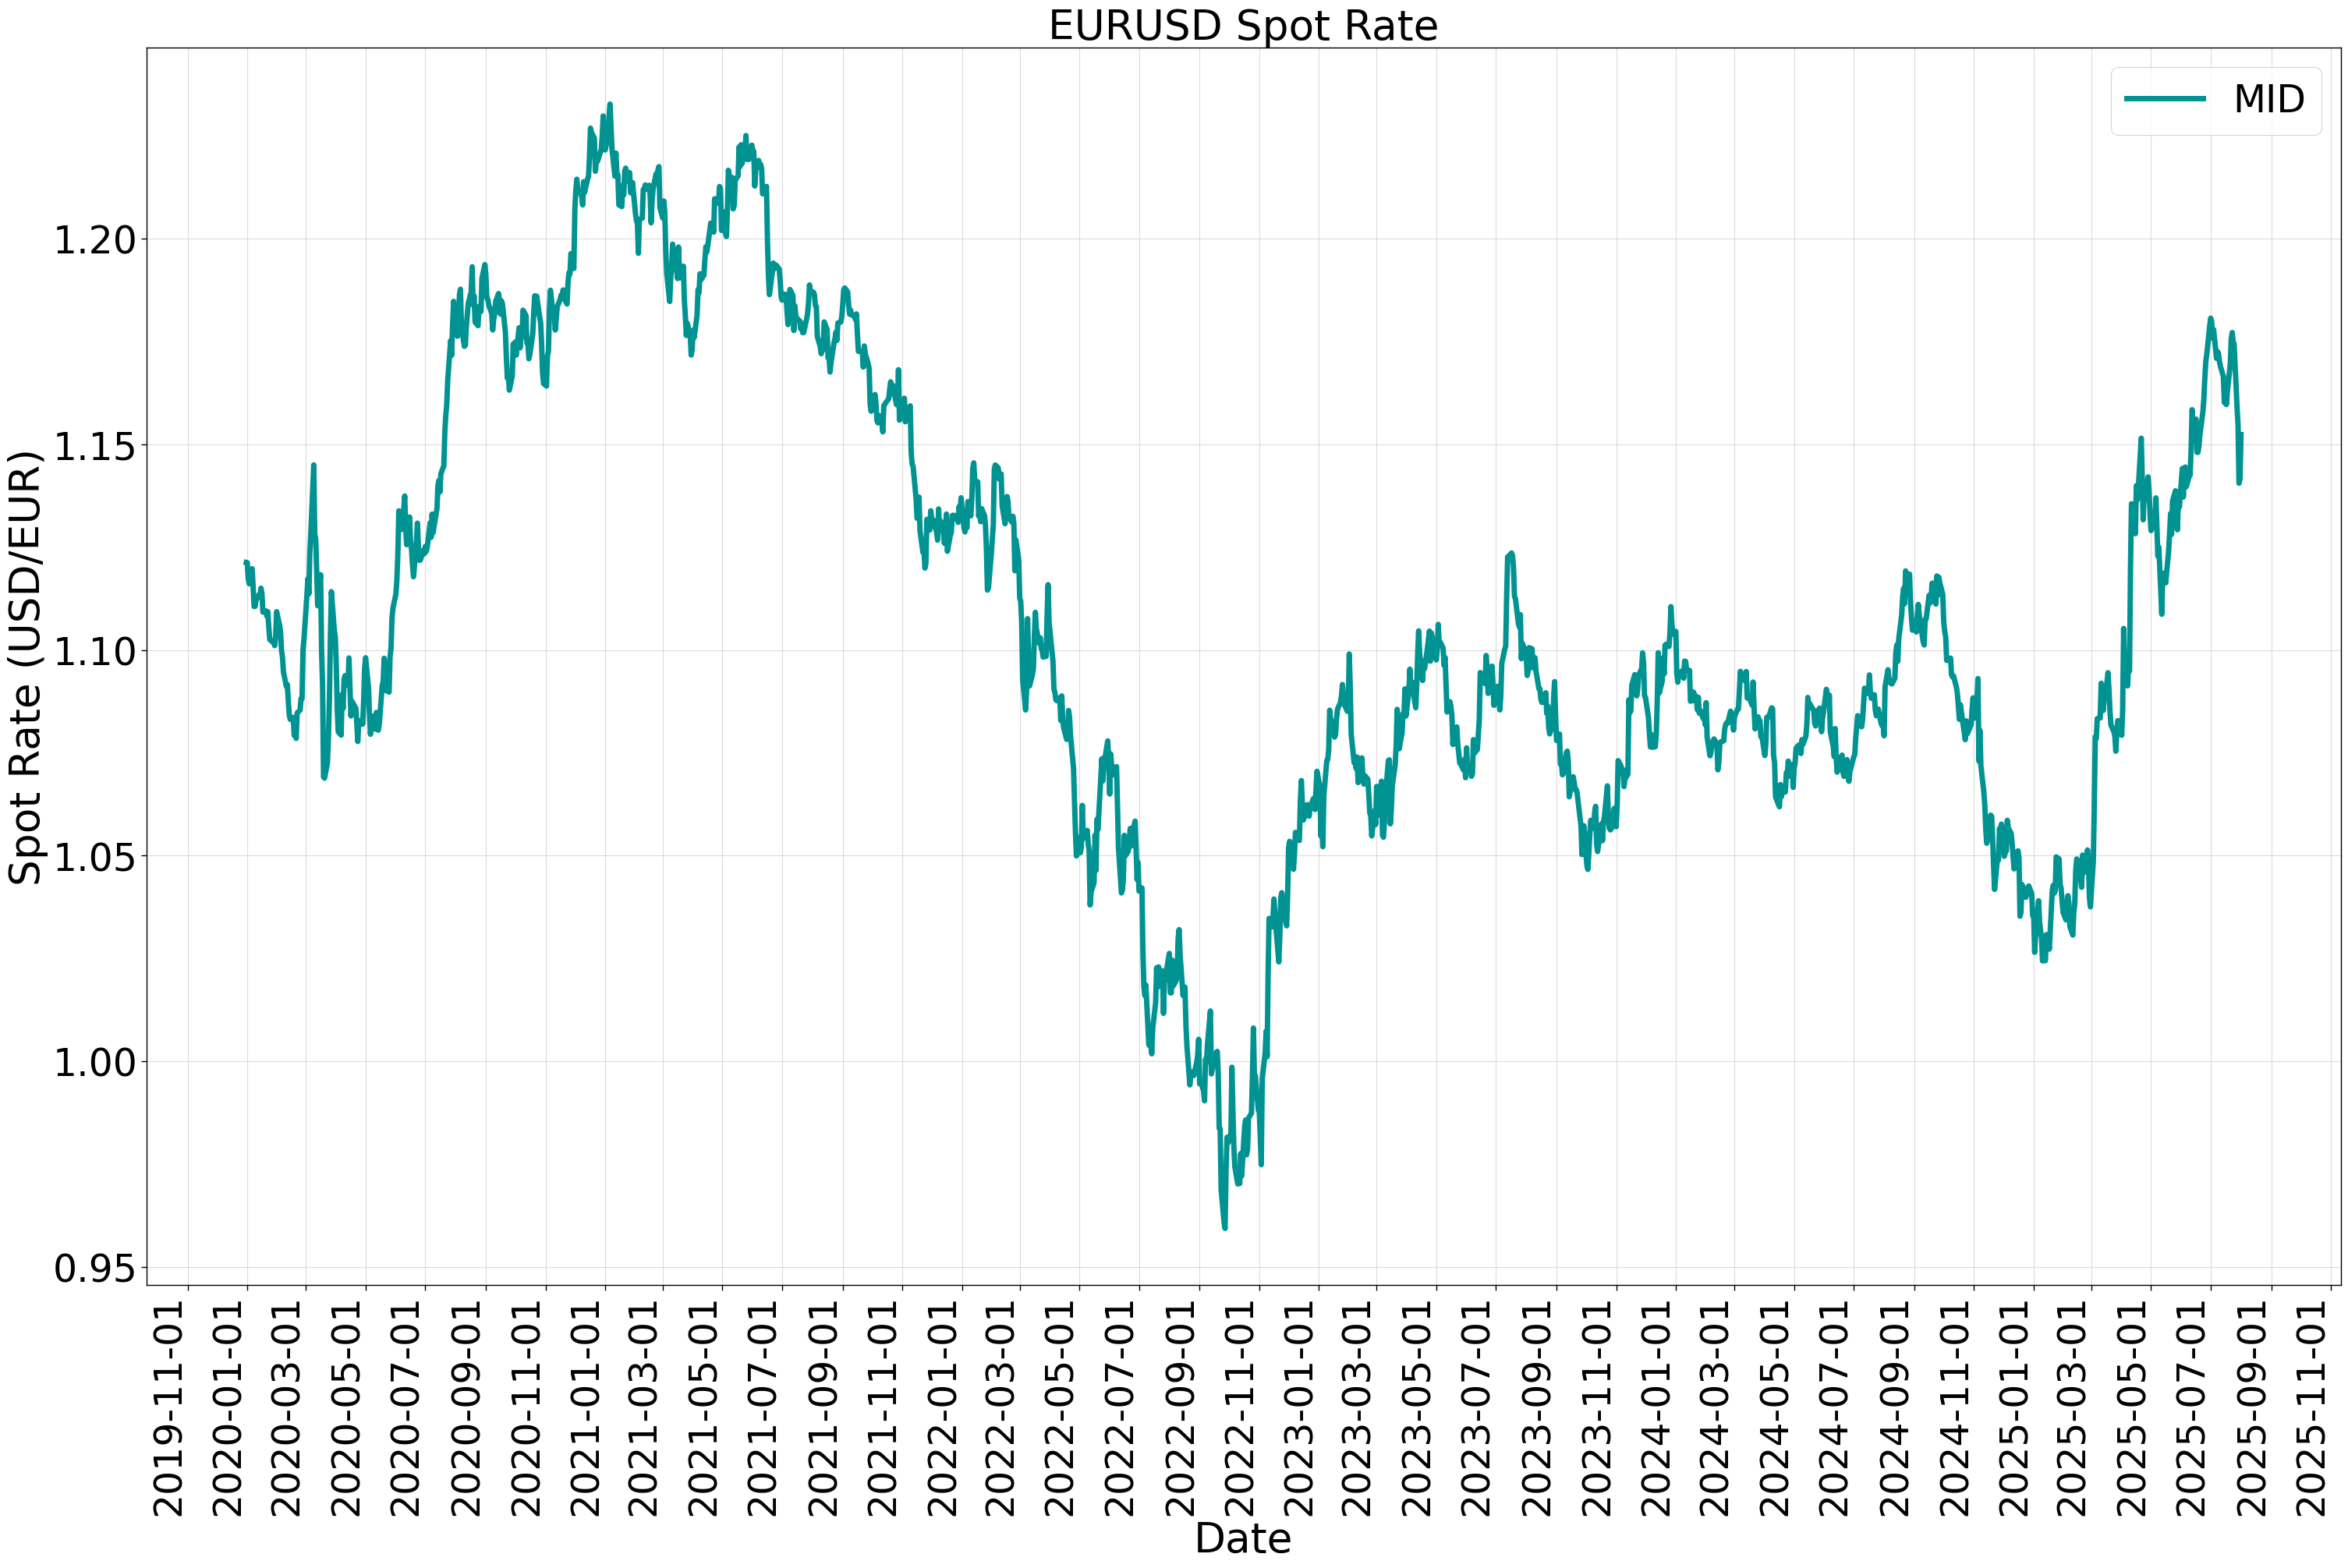

In [7]:
fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_Spot_MID'], label='MID')
fig.set_title('EURUSD Spot Rate')
fig.set_ylabel('Spot Rate (USD/EUR)')
fig.legend()

ax = plt.gca() 

# Use ConciseDateFormatter for automatic, clean date formatting
date_form = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=90, ha='right')
plt.show()

## Spot bid-ask Spread

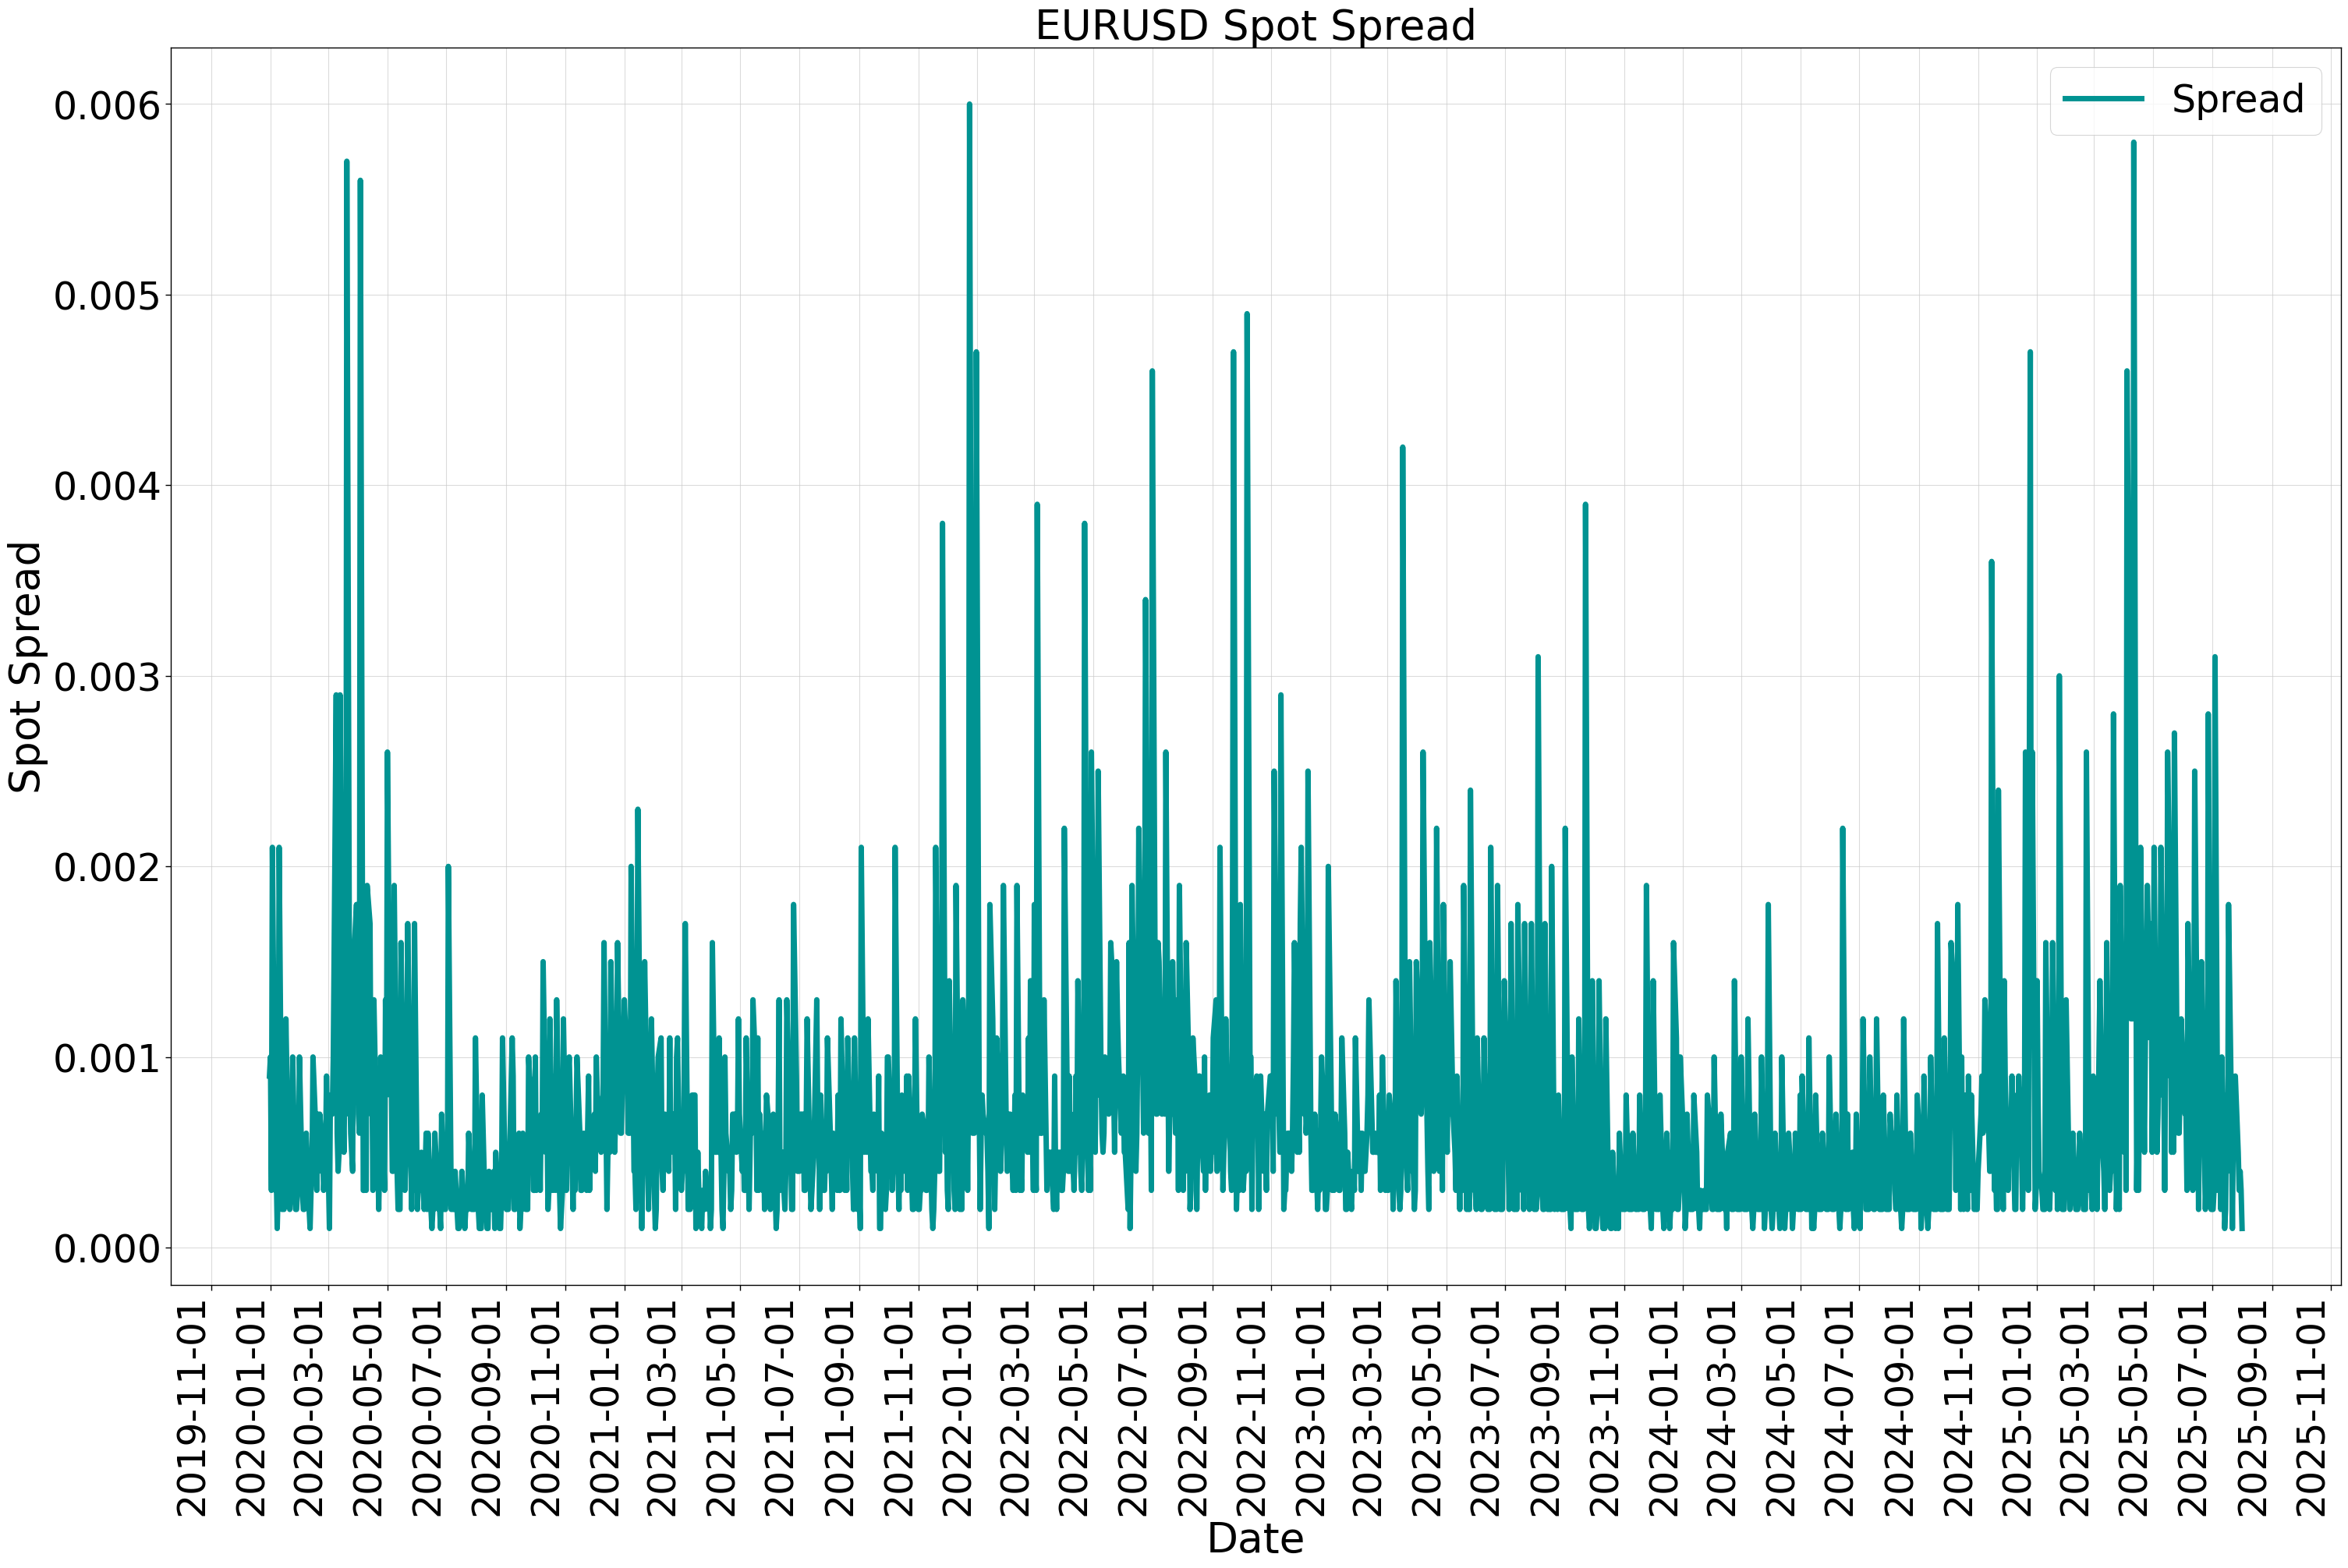

In [8]:
market_df['EURUSD_Spot_SPREAD'] = market_df['EURUSD_Spot_ASK']-market_df['EURUSD_Spot_BID']

fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_Spot_SPREAD'], label='Spread')
fig.set_title('EURUSD Spot Spread')
fig.set_ylabel('Spot Spread')
fig.legend()

ax = plt.gca() 

# Use ConciseDateFormatter for automatic, clean date formatting
date_form = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=90, ha='right')
plt.show()

## Spot Returns Distribution

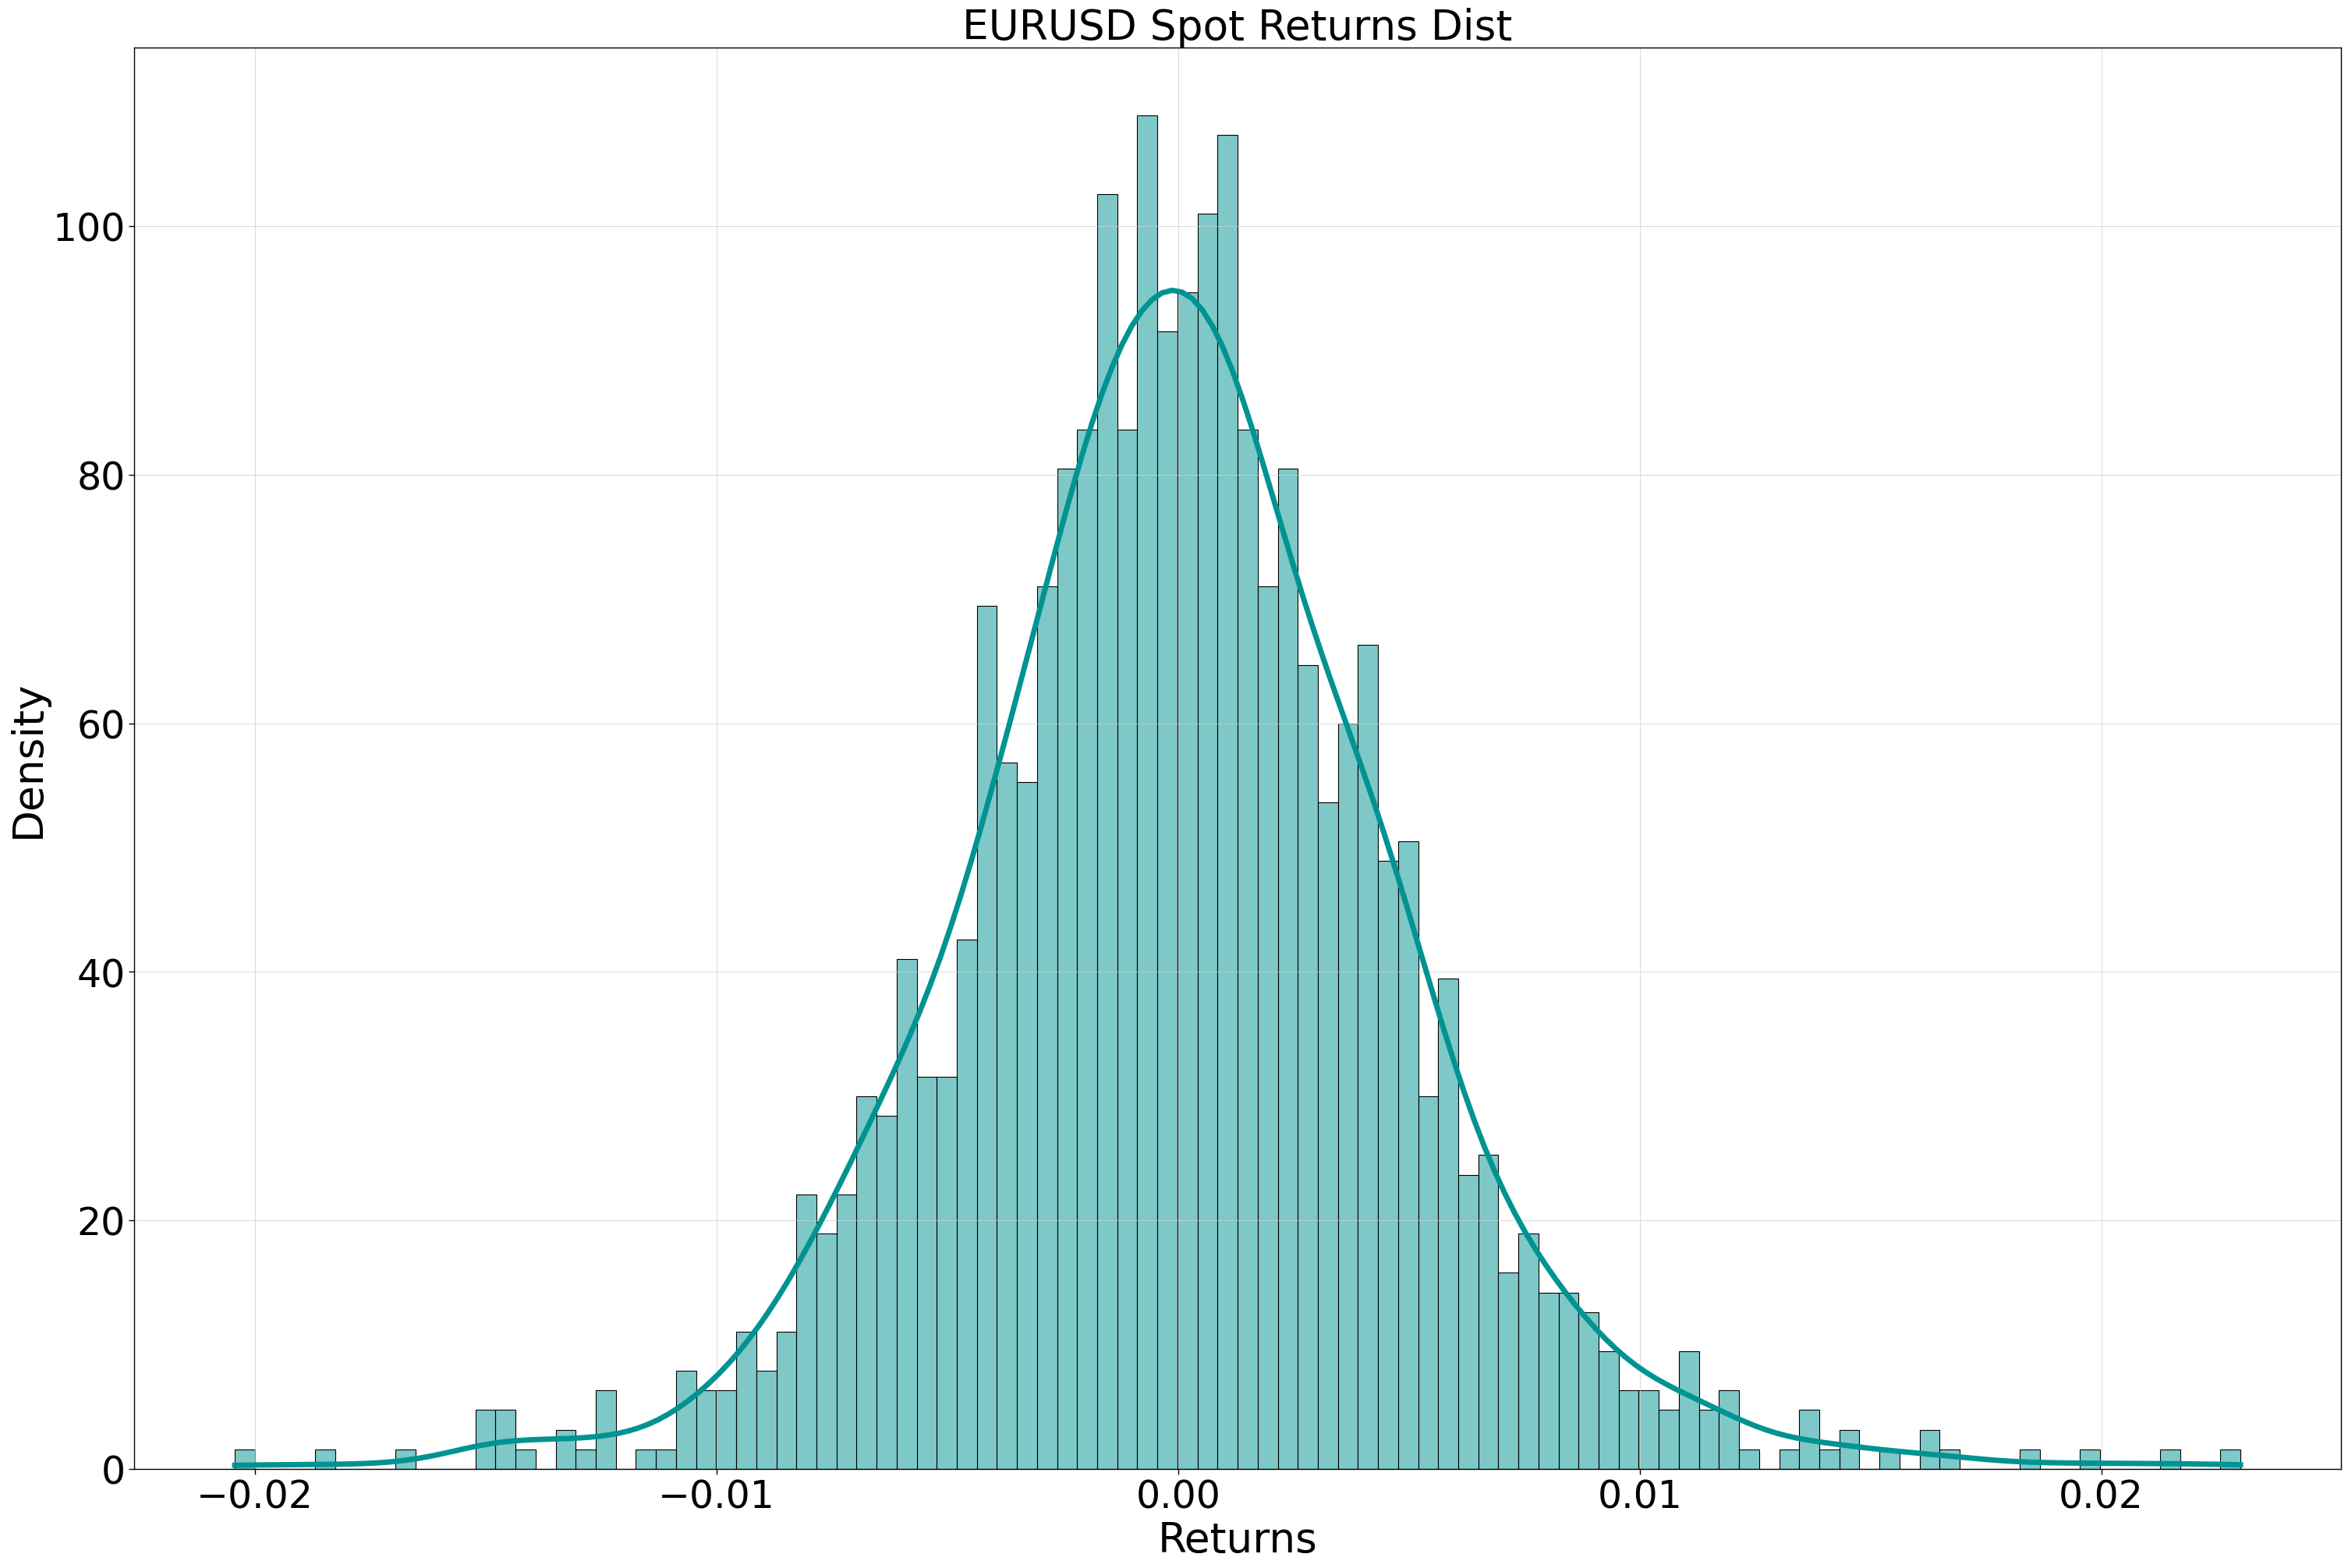

In [9]:
market_df['EURUSD_Spot_RETURNS'] = market_df['EURUSD_Spot_MID'].pct_change()
market_df['EURUSD_Spot_LOG_RETURNS'] = np.log(market_df['EURUSD_Spot_MID'] / market_df['EURUSD_Spot_MID'].shift(1))

returns = market_df['EURUSD_Spot_RETURNS'].dropna()
fig = sns.histplot(returns, bins=100, stat='density',kde=True)

fig.set_title('EURUSD Spot Returns Dist')
fig.set_ylabel('Density')
fig.set_xlabel('Returns')
plt.show()

## Implied Volatility Struct

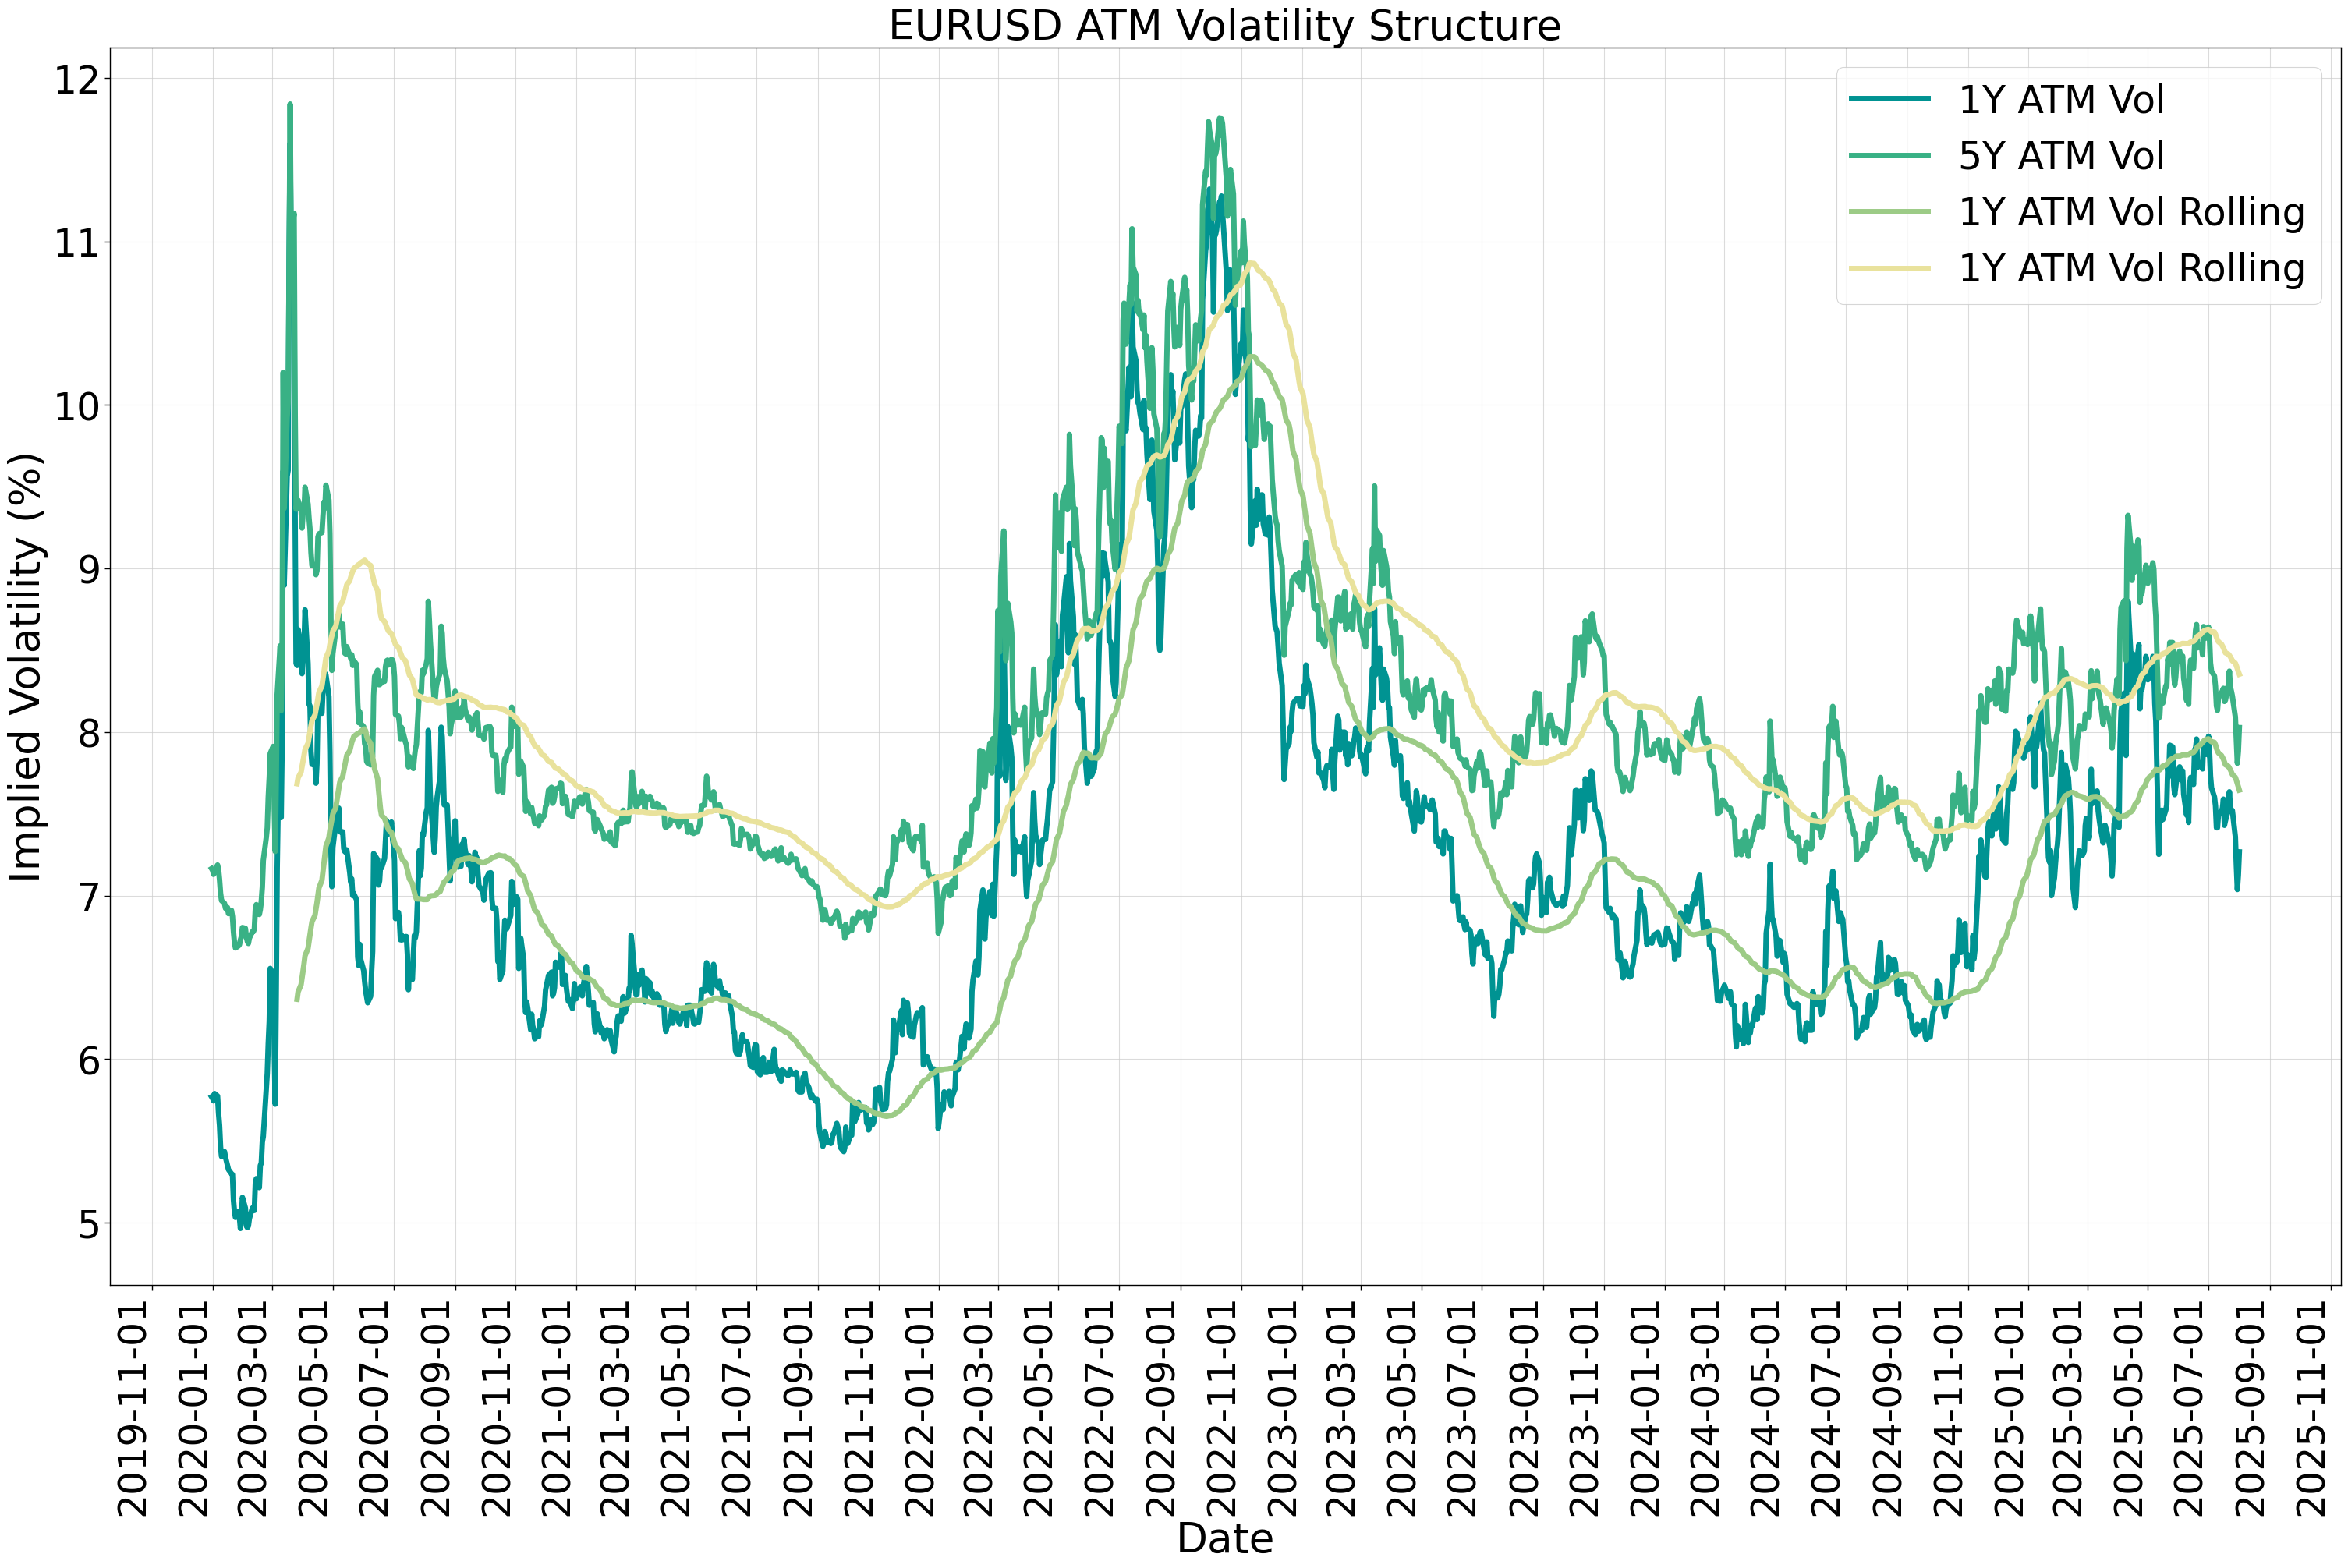

In [10]:
fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_1Y_ATM_VOL_MID'], label='1Y ATM Vol')
fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_5Y_ATM_VOL_MID'], label='5Y ATM Vol')
fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_1Y_ATM_VOL_MID'].rolling(63).mean(), label='1Y ATM Vol Rolling')
fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_5Y_ATM_VOL_MID'].rolling(63).mean(), label='1Y ATM Vol Rolling')


fig.set_title('EURUSD ATM Volatility Structure')
fig.set_ylabel('Implied Volatility (%)')
fig.legend()

ax = plt.gca() 

# Use ConciseDateFormatter for automatic, clean date formatting
date_form = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=90, ha='right')
plt.show()

## Volatility Spreads

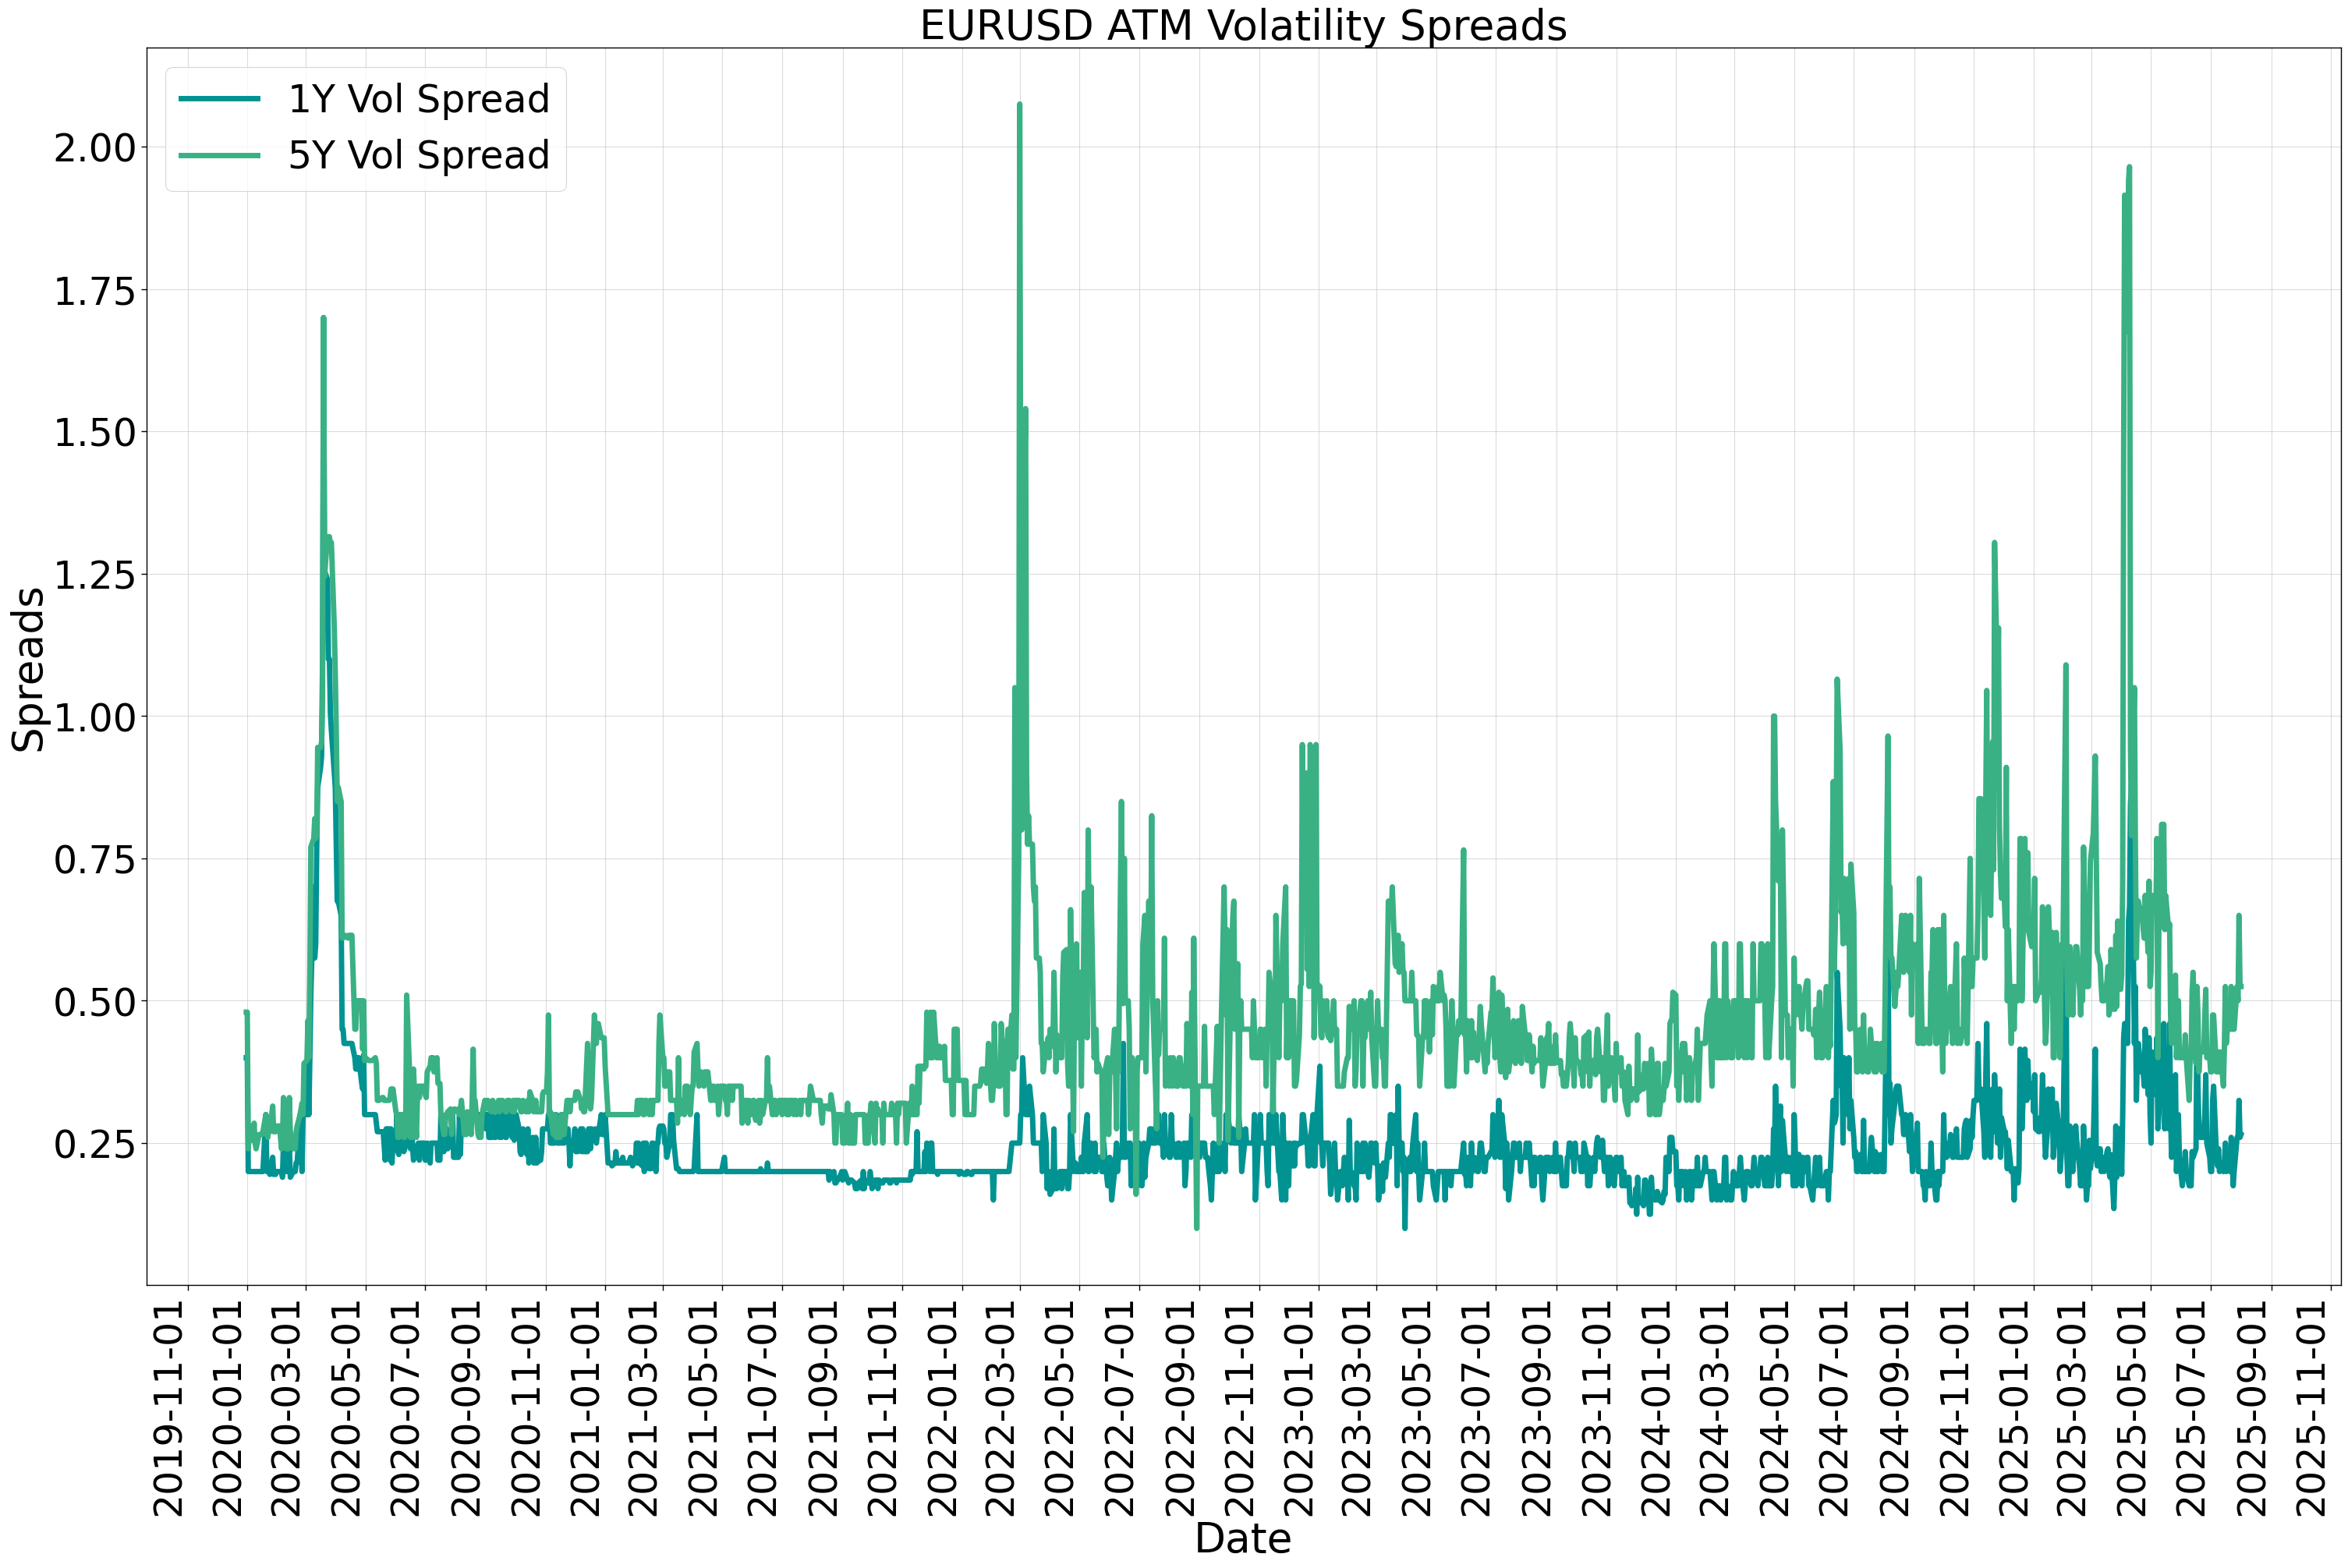

In [11]:
market_df['EURUSD_1Y_ATM_Spread'] = market_df['EURUSD_1Y_ATM_VOL_ASK'] - market_df['EURUSD_1Y_ATM_VOL_BID']
market_df['EURUSD_5Y_ATM_Spread'] = market_df['EURUSD_5Y_ATM_VOL_ASK'] - market_df['EURUSD_5Y_ATM_VOL_BID']

fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_1Y_ATM_Spread'], label='1Y Vol Spread')
fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_5Y_ATM_Spread'], label='5Y Vol Spread')

fig.set_title('EURUSD ATM Volatility Spreads')
fig.set_ylabel('Spreads')
fig.legend()

ax = plt.gca() 

# Use ConciseDateFormatter for automatic, clean date formatting
date_form = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=90, ha='right')
plt.show()

## Volatility Struct Distribution

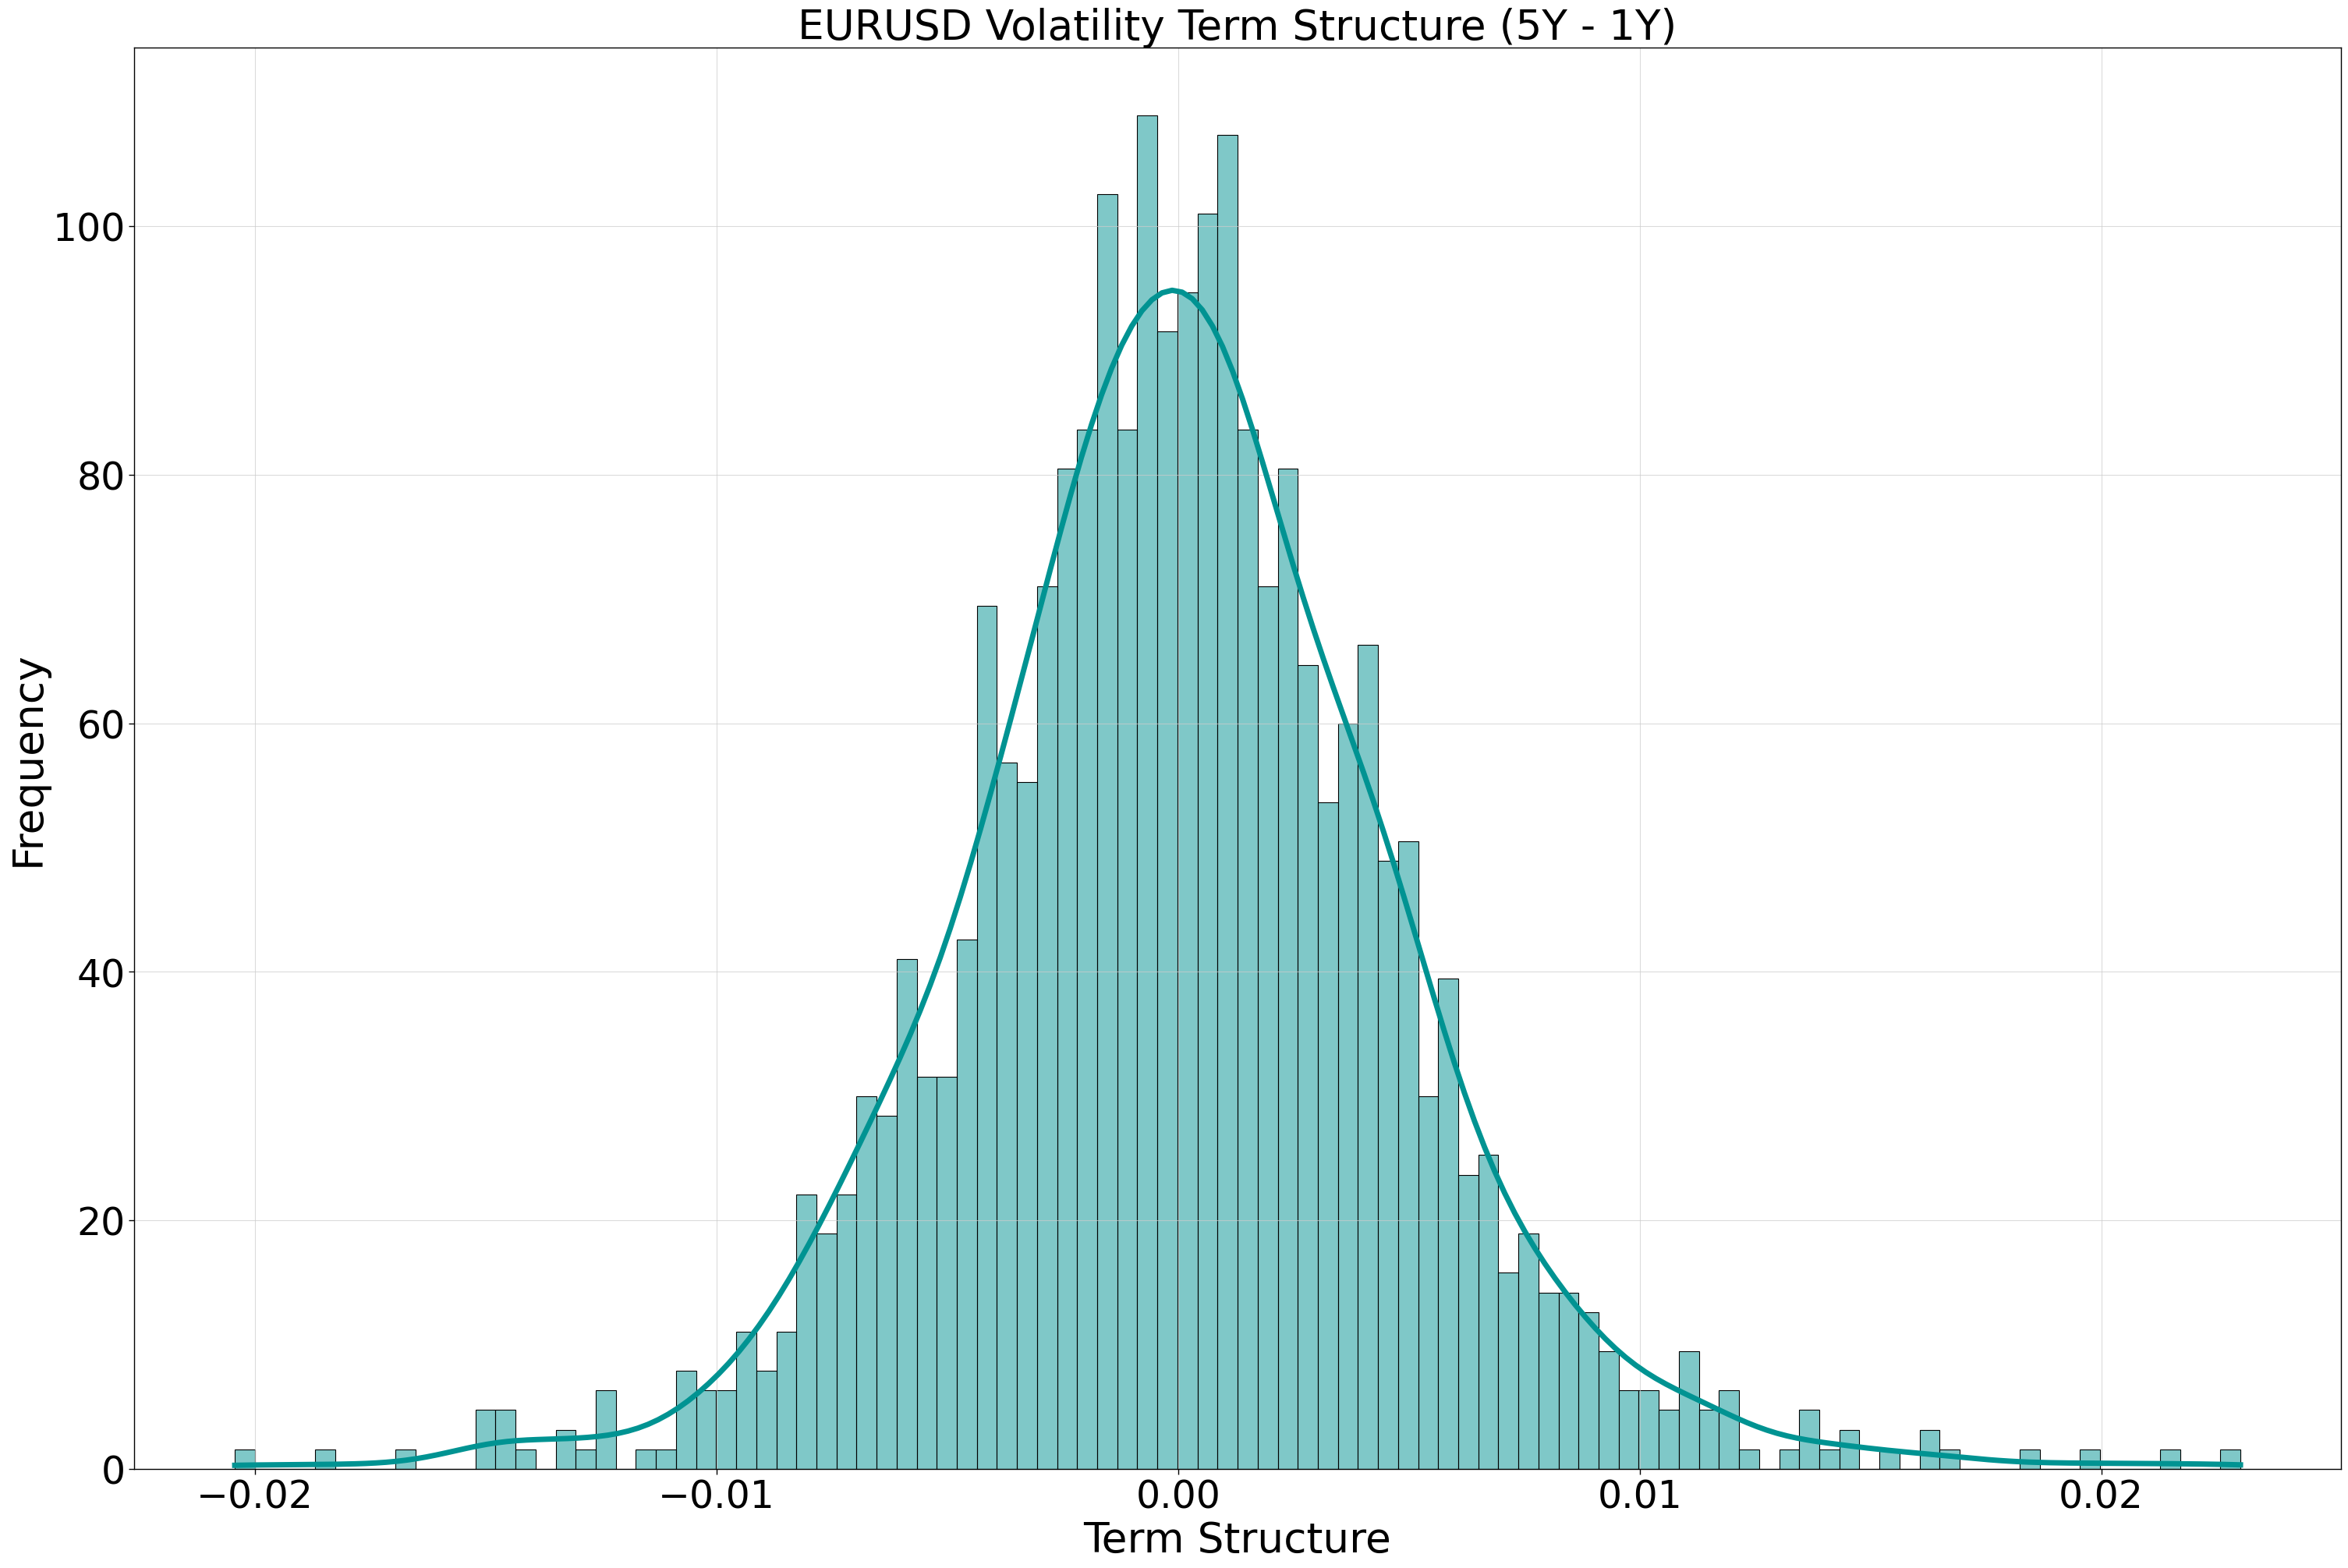

In [12]:
market_df['EURUSD_5Y_ATM_VOL_STRUCT'] = market_df['EURUSD_5Y_ATM_VOL_MID'] - market_df['EURUSD_1Y_ATM_VOL_MID']

structure = market_df['EURUSD_5Y_ATM_VOL_STRUCT'].dropna()
fig = sns.histplot(returns, bins=100, stat='density',kde=True)

fig.set_title('EURUSD Volatility Term Structure (5Y - 1Y)')
fig.set_ylabel('Frequency')
fig.set_xlabel('Term Structure')
plt.show()

## Risk Reversals

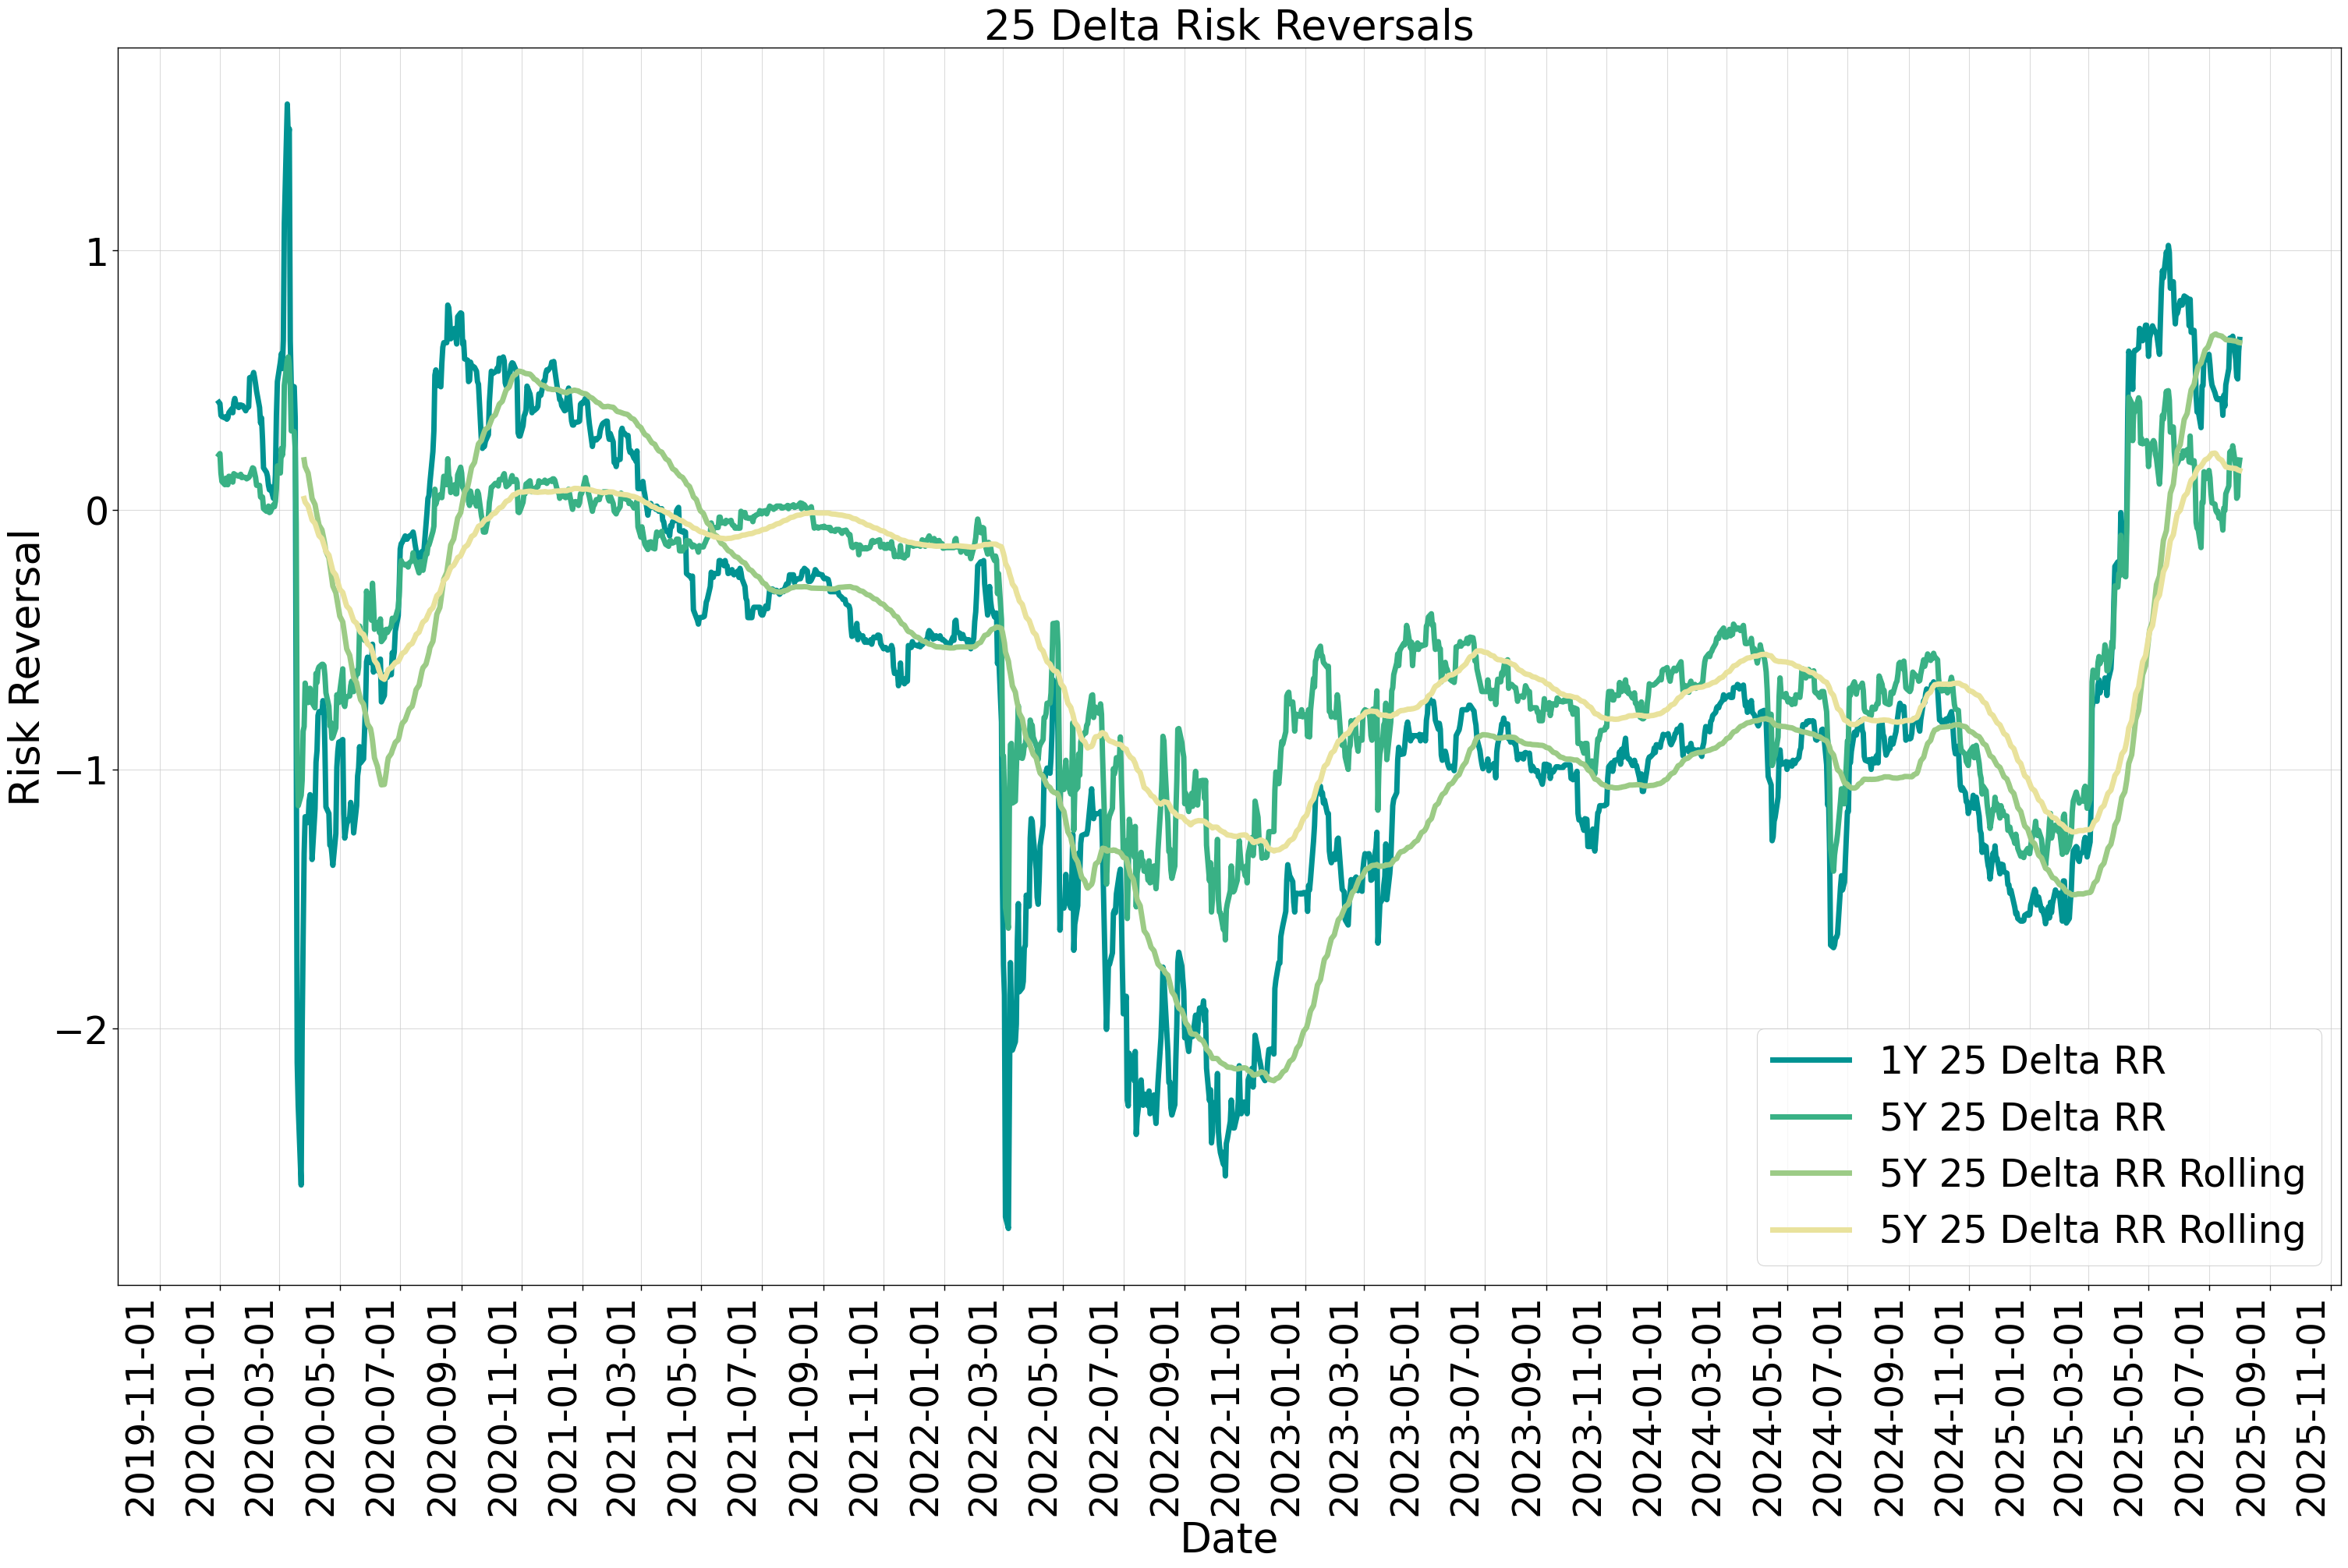

In [13]:
fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_1Y_25DELTA_Risk_Reversal_MID'], label='1Y 25 Delta RR')
fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_5Y_25DELTA_Risk_Reversal_MID'], label='5Y 25 Delta RR')
fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_1Y_25DELTA_Risk_Reversal_MID'].rolling(63).mean(), label='5Y 25 Delta RR Rolling')
fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_5Y_25DELTA_Risk_Reversal_MID'].rolling(63).mean(), label='5Y 25 Delta RR Rolling')


fig.set_title('25 Delta Risk Reversals')
fig.set_ylabel('Risk Reversal')
fig.legend()

ax = plt.gca() 

# Use ConciseDateFormatter for automatic, clean date formatting
date_form = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=90, ha='right')
plt.show()

## Risk Reversal Distribution

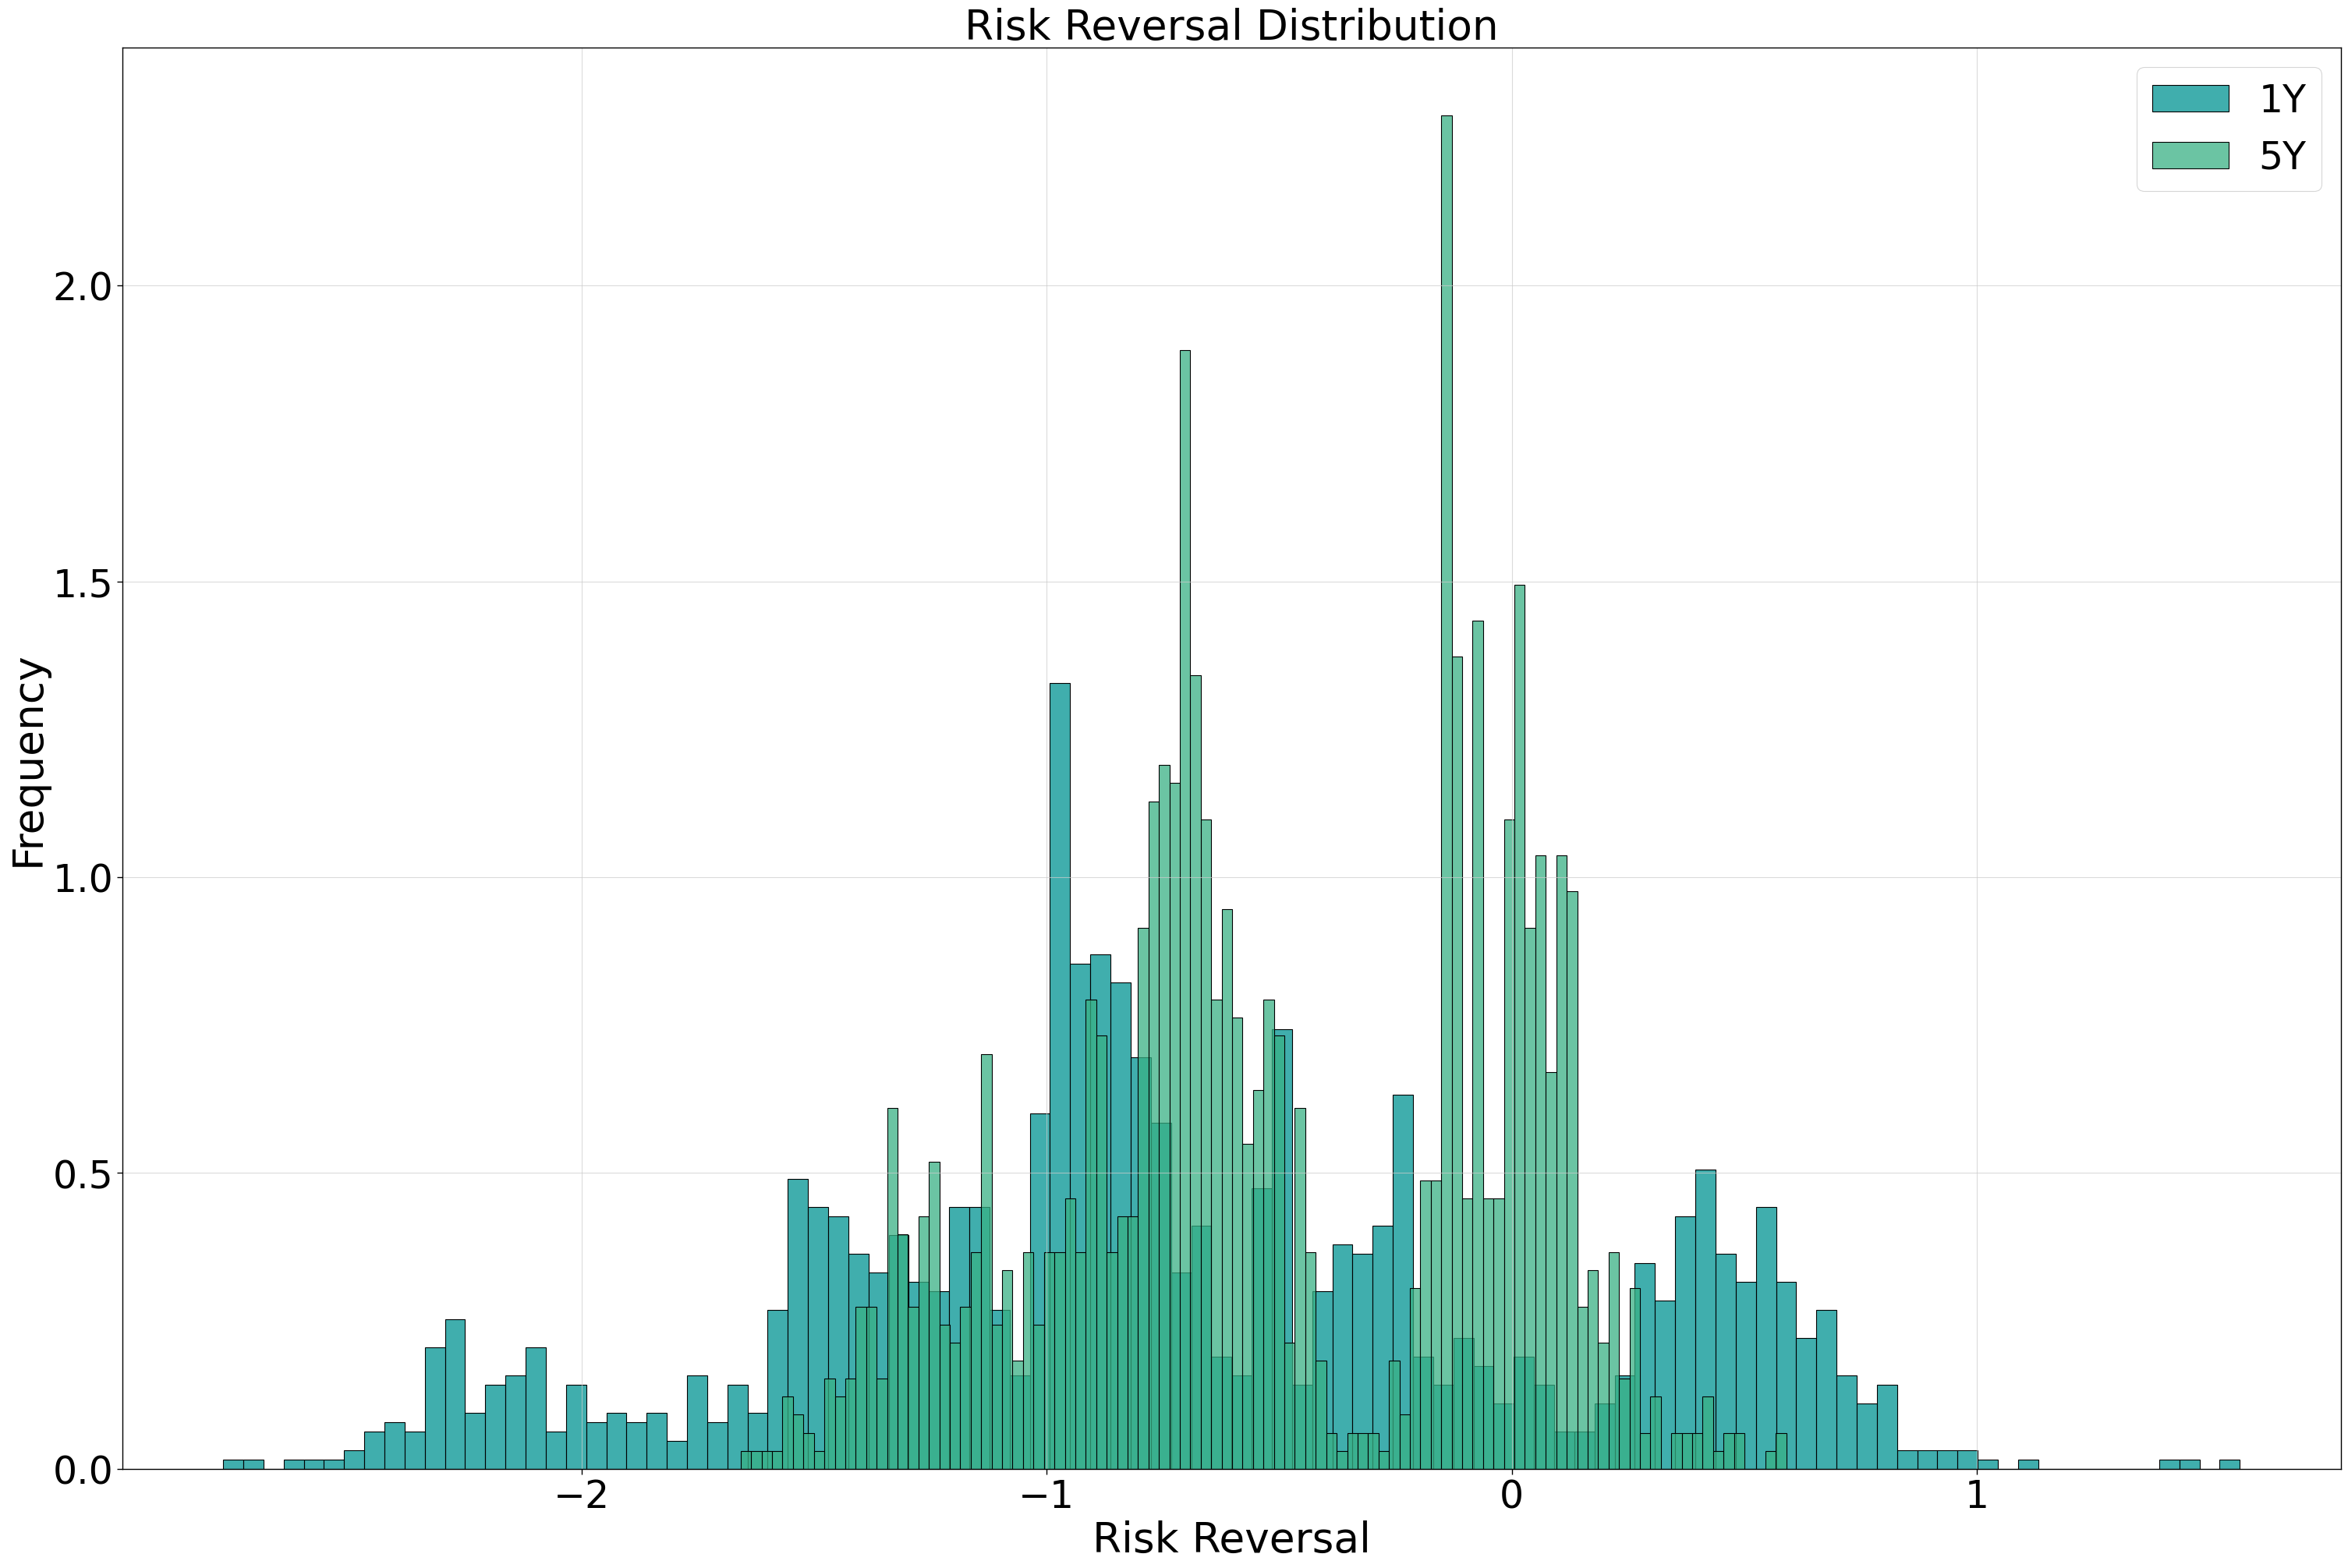

In [14]:

fig = sns.histplot(market_df['EURUSD_1Y_25DELTA_Risk_Reversal_MID'].dropna(), bins=100, stat='density',label='1Y')
fig = sns.histplot(market_df['EURUSD_5Y_25DELTA_Risk_Reversal_MID'].dropna(), bins=100, stat='density',label='5Y')

fig.set_title('Risk Reversal Distribution')
fig.set_ylabel('Frequency')
fig.set_xlabel('Risk Reversal')
fig.legend()
plt.show()

## Butterflies

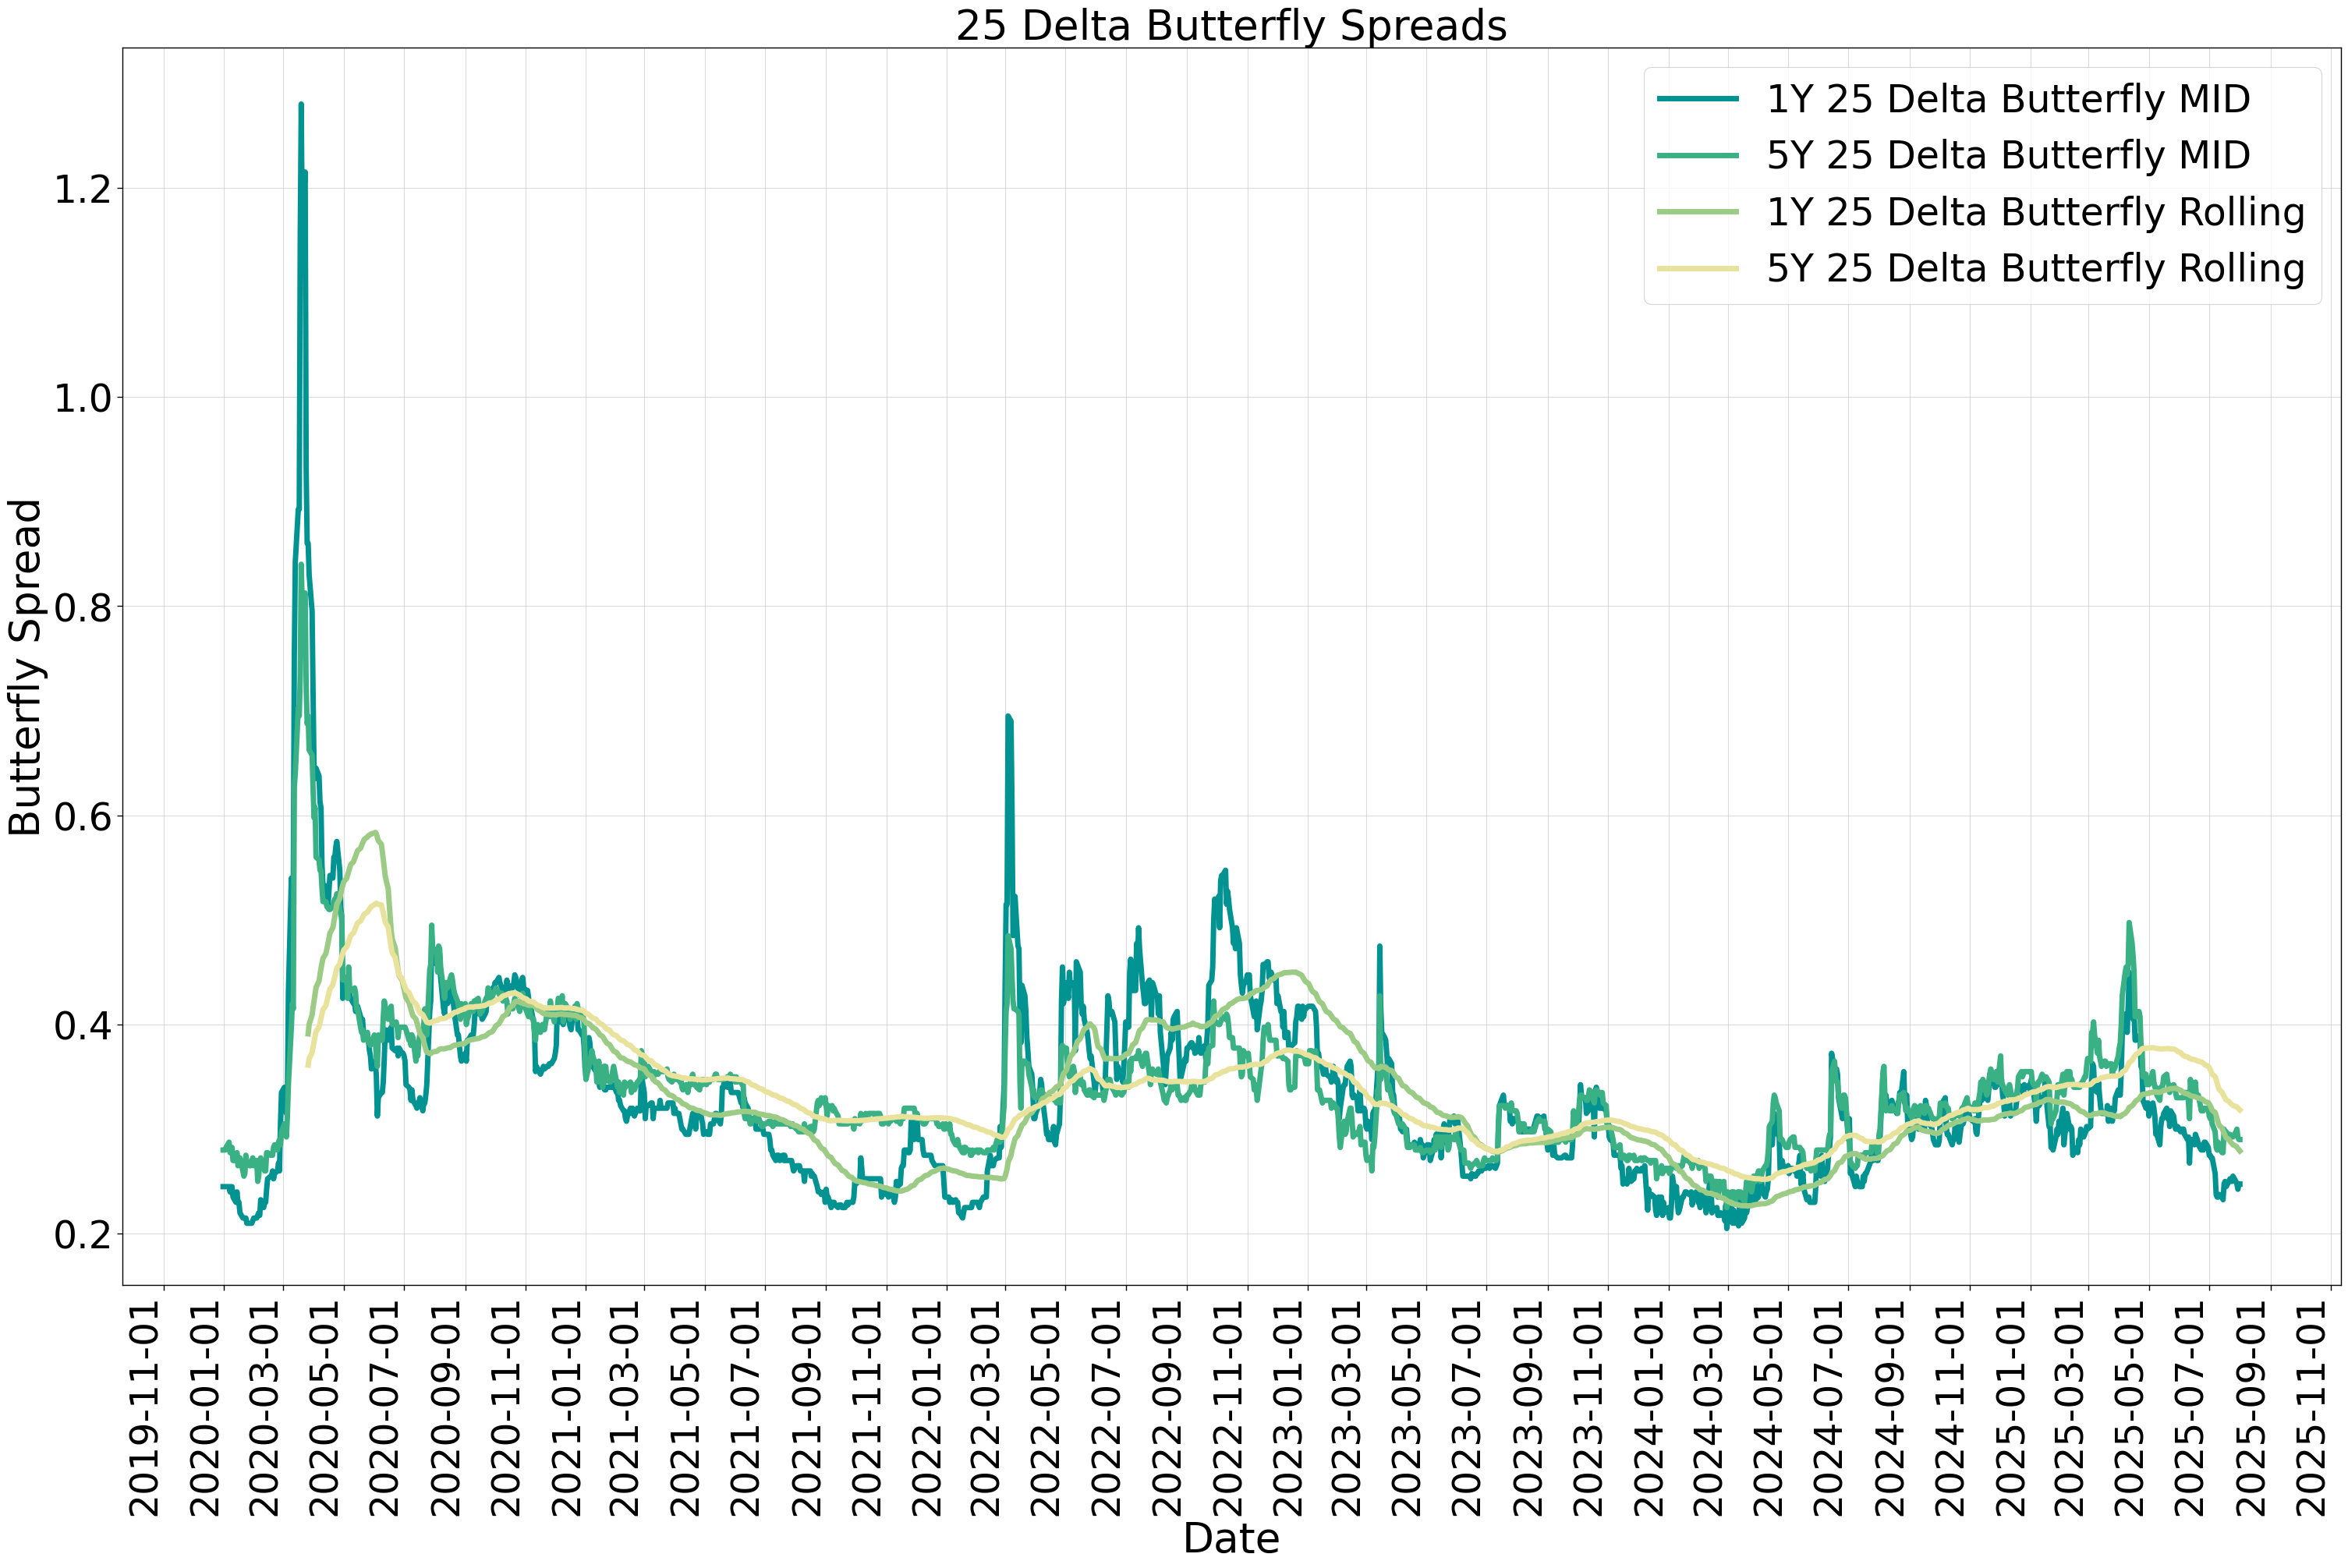

In [15]:
fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_1Y_25DELTA_Butterfly_MID'], label='1Y 25 Delta Butterfly MID')
fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_5Y_25DELTA_Butterfly_MID'], label='5Y 25 Delta Butterfly MID')
fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_1Y_25DELTA_Butterfly_MID'].rolling(63).mean(), label='1Y 25 Delta Butterfly Rolling')
fig = sns.lineplot(x=market_df.index,y=market_df['EURUSD_5Y_25DELTA_Butterfly_MID'].rolling(63).mean(), label='5Y 25 Delta Butterfly Rolling')

fig.set_title('25 Delta Butterfly Spreads')
fig.set_ylabel('Butterfly Spread')
fig.legend()

ax = plt.gca() 

# Use ConciseDateFormatter for automatic, clean date formatting
date_form = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=90, ha='right')
plt.show()

## Skew Persistence

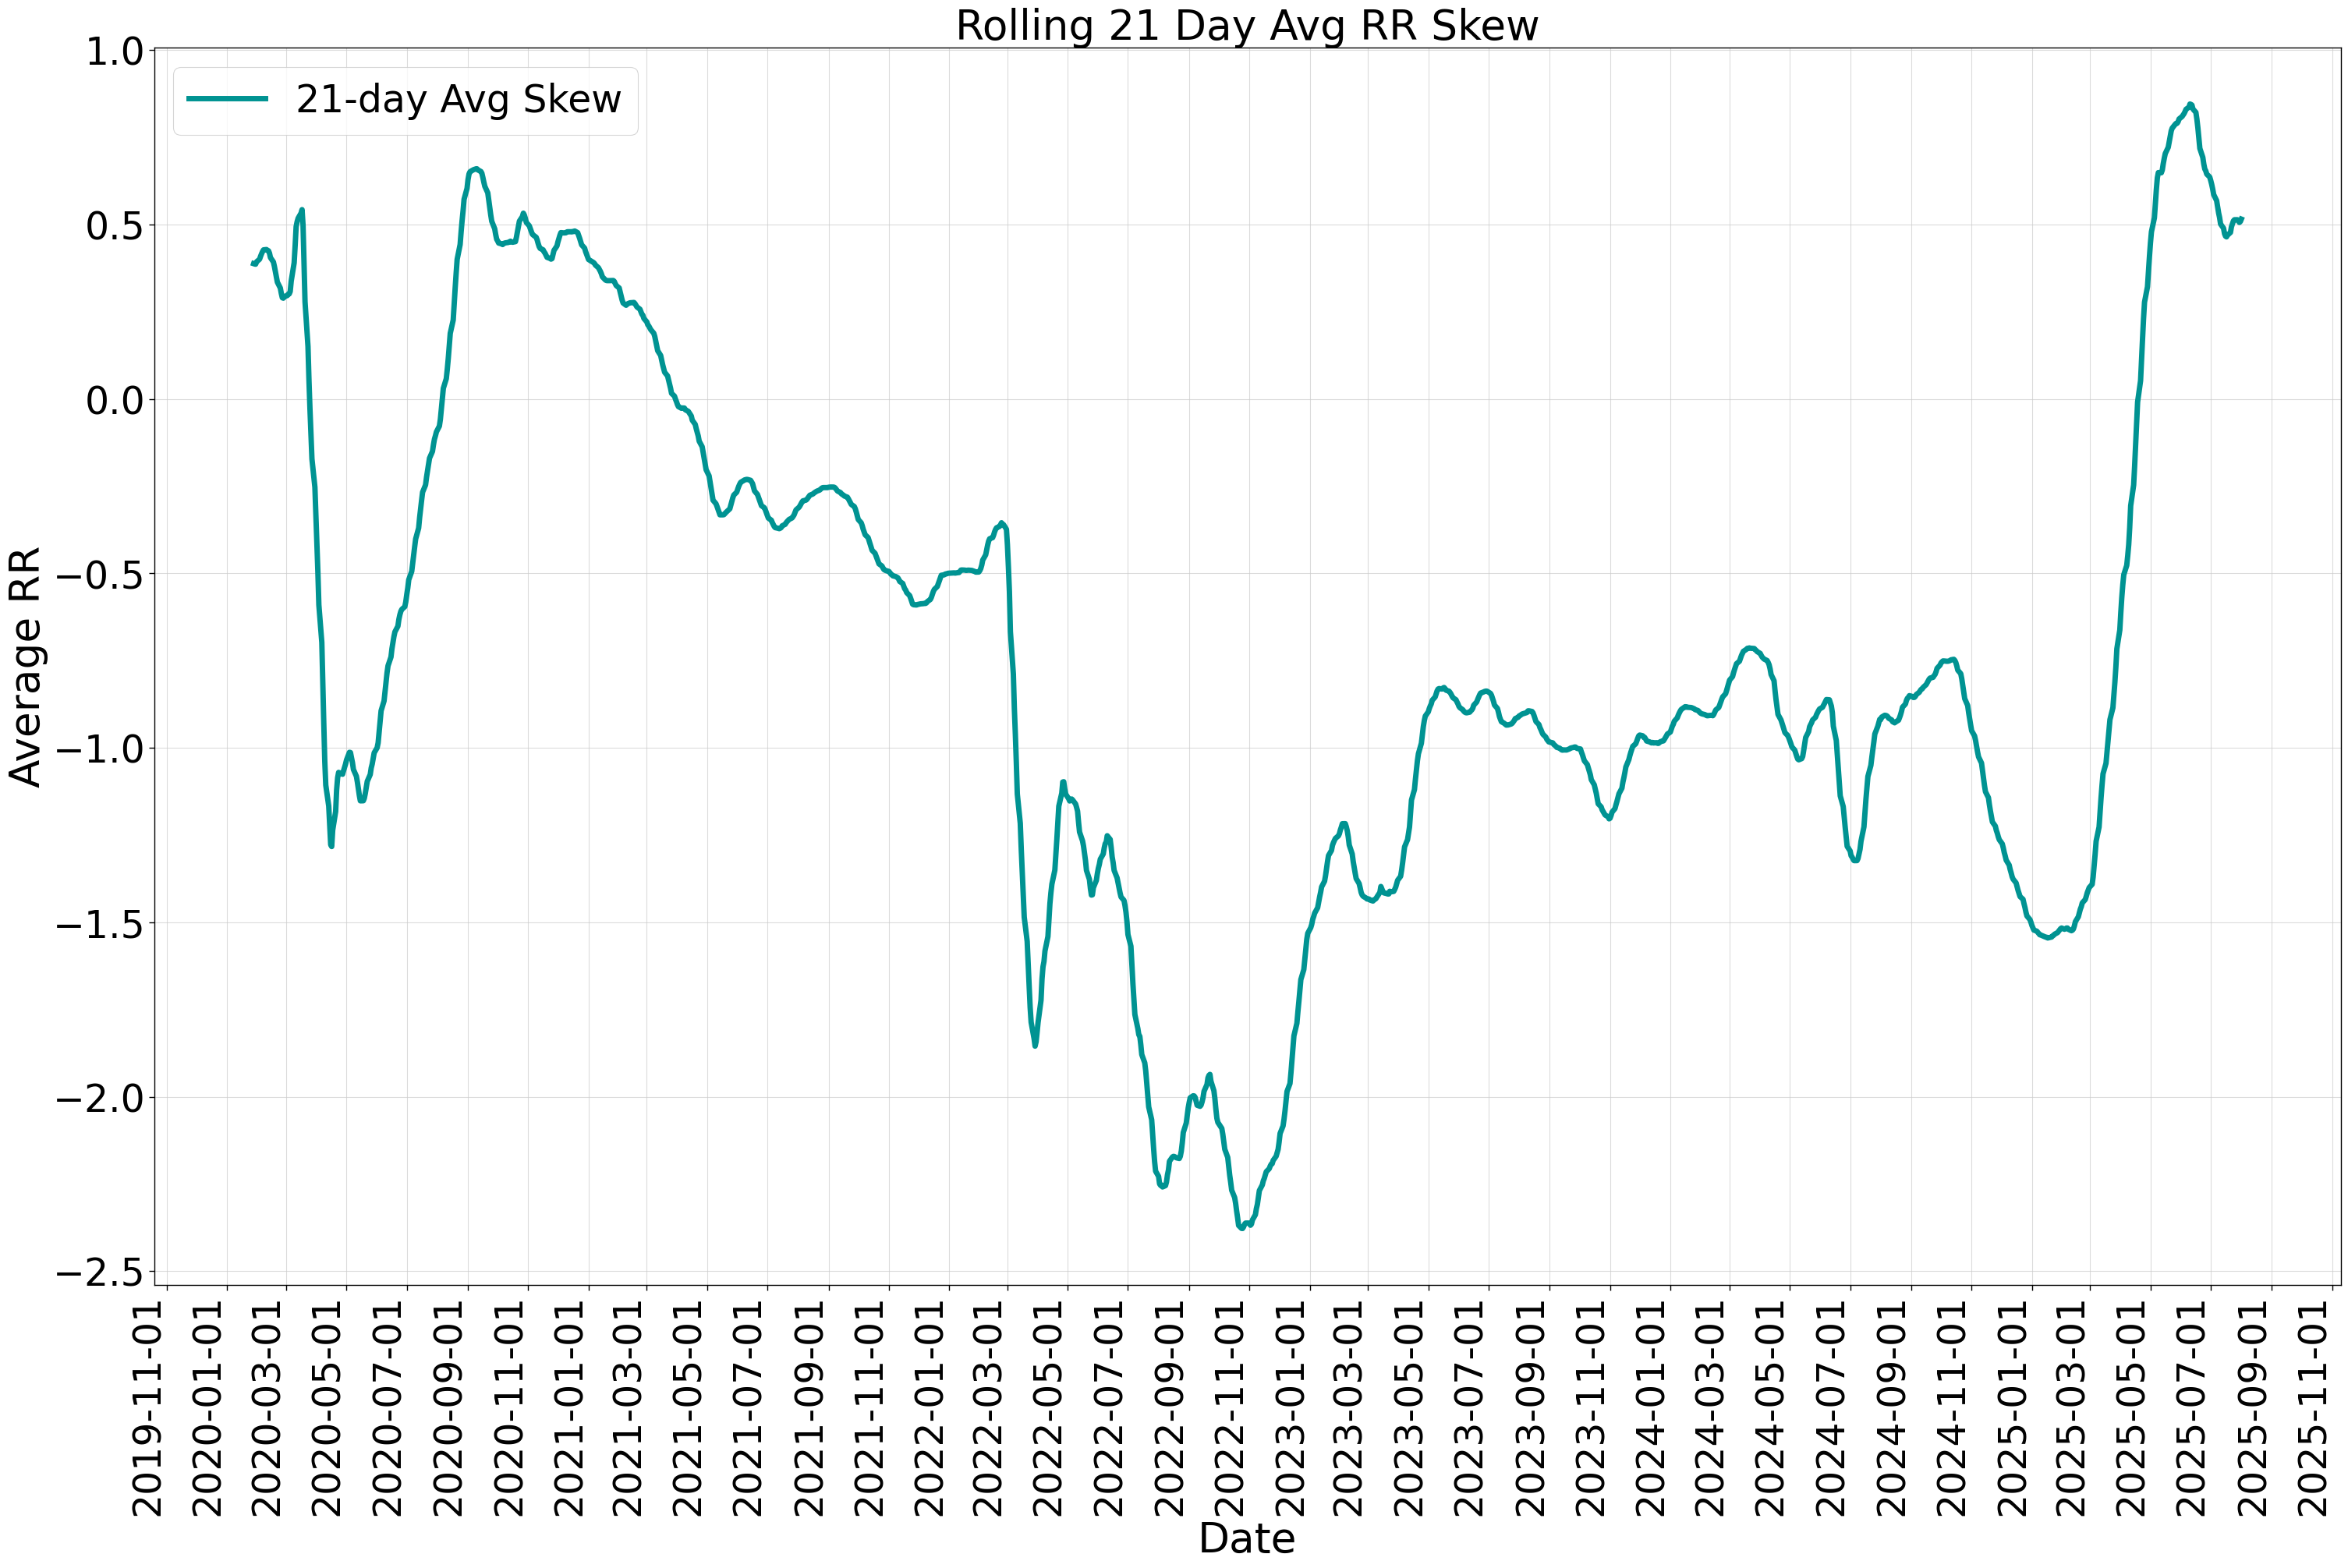

In [16]:
fig = sns.lineplot(x=market_df.index, y=market_df['EURUSD_1Y_25DELTA_Risk_Reversal_MID'].rolling(window=21).mean(),label='21-day Avg Skew')

fig.set_title('Rolling 21 Day Avg RR Skew')
fig.set_ylabel('Average RR')
fig.legend()

ax = plt.gca() 

# Use ConciseDateFormatter for automatic, clean date formatting
date_form = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=90, ha='right')
plt.show()

# Statistics Calculation

## Spot Stats

In [17]:
trading_days = 252
print(F"""
    Average Daily Spread: {market_df['EURUSD_Spot_SPREAD'].mean()*10000} pips,
    Annual Drift: {market_df['EURUSD_Spot_LOG_RETURNS'].mean() * trading_days},
    Annual Realised Volatility: {market_df['EURUSD_Spot_LOG_RETURNS'].std() * np.sqrt(trading_days)},
    Skewness: {market_df['EURUSD_Spot_LOG_RETURNS'].skew()},
    Kurtosis: {market_df['EURUSD_Spot_LOG_RETURNS'].kurtosis()}
""")


    Average Daily Spread: 6.535298149417394 pips,
    Annual Drift: 0.004724209538734722,
    Annual Realised Volatility: 0.07601935849116938,
    Skewness: 0.13357132607363567,
    Kurtosis: 1.6184500411503717



## Volatility Stats (Risk Premium)

In [18]:
market_df['EURUSD_1Y_REALISED_VOL'] = market_df['EURUSD_Spot_LOG_RETURNS'].rolling(window=trading_days).std() * np.sqrt(trading_days)
vol_risk_premium = market_df['EURUSD_1Y_ATM_VOL_MID'] - market_df['EURUSD_1Y_REALISED_VOL']
print(F"""

    Mean: {vol_risk_premium.mean()}
    Positive: {(vol_risk_premium > 0).mean()} %

""")



    Mean: 7.140854862957396
    Positive: 0.8272789581905414 %




## Put Skews

In [19]:
print(F"""
    1Y Put Skew: {(market_df['EURUSD_1Y_25DELTA_Risk_Reversal_MID']<0).mean()},
    5Y Put Skew: {(market_df['EURUSD_5Y_25DELTA_Risk_Reversal_MID']<0).mean()},
""")


    1Y Put Skew: 0.7895819054146676,
    5Y Put Skew: 0.8026045236463331,



## Draw Downs

In [20]:
market_df['EURUSD_SPOT_CUMULATIVE'] = (1+market_df['EURUSD_Spot_RETURNS'].cumprod())
market_df['EURUSD_SPOT_PEAK'] = market_df['EURUSD_SPOT_CUMULATIVE'].cummax()
market_df['EURUSD_SPOT_DRAWDOWN'] = (market_df['EURUSD_SPOT_CUMULATIVE'] - market_df['EURUSD_SPOT_PEAK']) / market_df['EURUSD_SPOT_PEAK']

print(F"""
    Max Drawdown: {market_df['EURUSD_SPOT_DRAWDOWN'].min()},
    Current Drawdown: {market_df['EURUSD_SPOT_DRAWDOWN'].iloc[-1]},
""")


    Max Drawdown: -1.576645869789822e-07,
    Current Drawdown: -1.5749683474887242e-07,



# Volatility Regimes

In [21]:
High_vol_thresh = market_df['EURUSD_1Y_ATM_VOL_MID'].quantile(0.75)
Low_vol_thresh = market_df['EURUSD_1Y_ATM_VOL_MID'].quantile(0.25)

high_vol_periods = market_df['EURUSD_1Y_ATM_VOL_MID'] > High_vol_thresh
low_vol_periods = market_df['EURUSD_1Y_ATM_VOL_MID'] < Low_vol_thresh
normal_vol_periods = ~high_vol_periods & ~low_vol_periods


regime_stats = []
for regime_name, regime_mask in [
    ('HIGH VOL', high_vol_periods),
    ('NORMAL VOL', normal_vol_periods),
    ('LOW VOL', low_vol_periods)
]:
    if regime_mask.sum() > 0:
        regime_data = market_df.loc[regime_mask]
        stats = {
            'Regime': regime_name,
            'Frequency': f"{regime_mask.mean():.2%}",
            'Avg Spot Return': f"{regime_data['EURUSD_Spot_RETURNS'].mean()*252:.3%}",
            'Spot Vol': f"{regime_data['EURUSD_Spot_LOG_RETURNS'].std()*np.sqrt(252):.3%}",
            'Avg RR 1Y': f"{regime_data['EURUSD_1Y_25DELTA_Risk_Reversal_MID'].mean():.3%}",
            'Put Skew %': f"{(regime_data['EURUSD_1Y_25DELTA_Risk_Reversal_MID'] < 0).mean():.1%}"
        }
        regime_stats.append(stats)

regime_df = pd.DataFrame(regime_stats)
regime_df.head()

Regime Frequency Avg Spot Return Spot Vol  Avg RR 1Y Put Skew %
0    HIGH VOL    25.02%          2.195%  10.311%  -133.716%      86.0%
1  NORMAL VOL    50.10%          2.255%   6.992%   -58.906%      76.6%
2     LOW VOL    24.88%         -3.701%   5.203%   -31.312%      76.6%

# Correlation Matrix

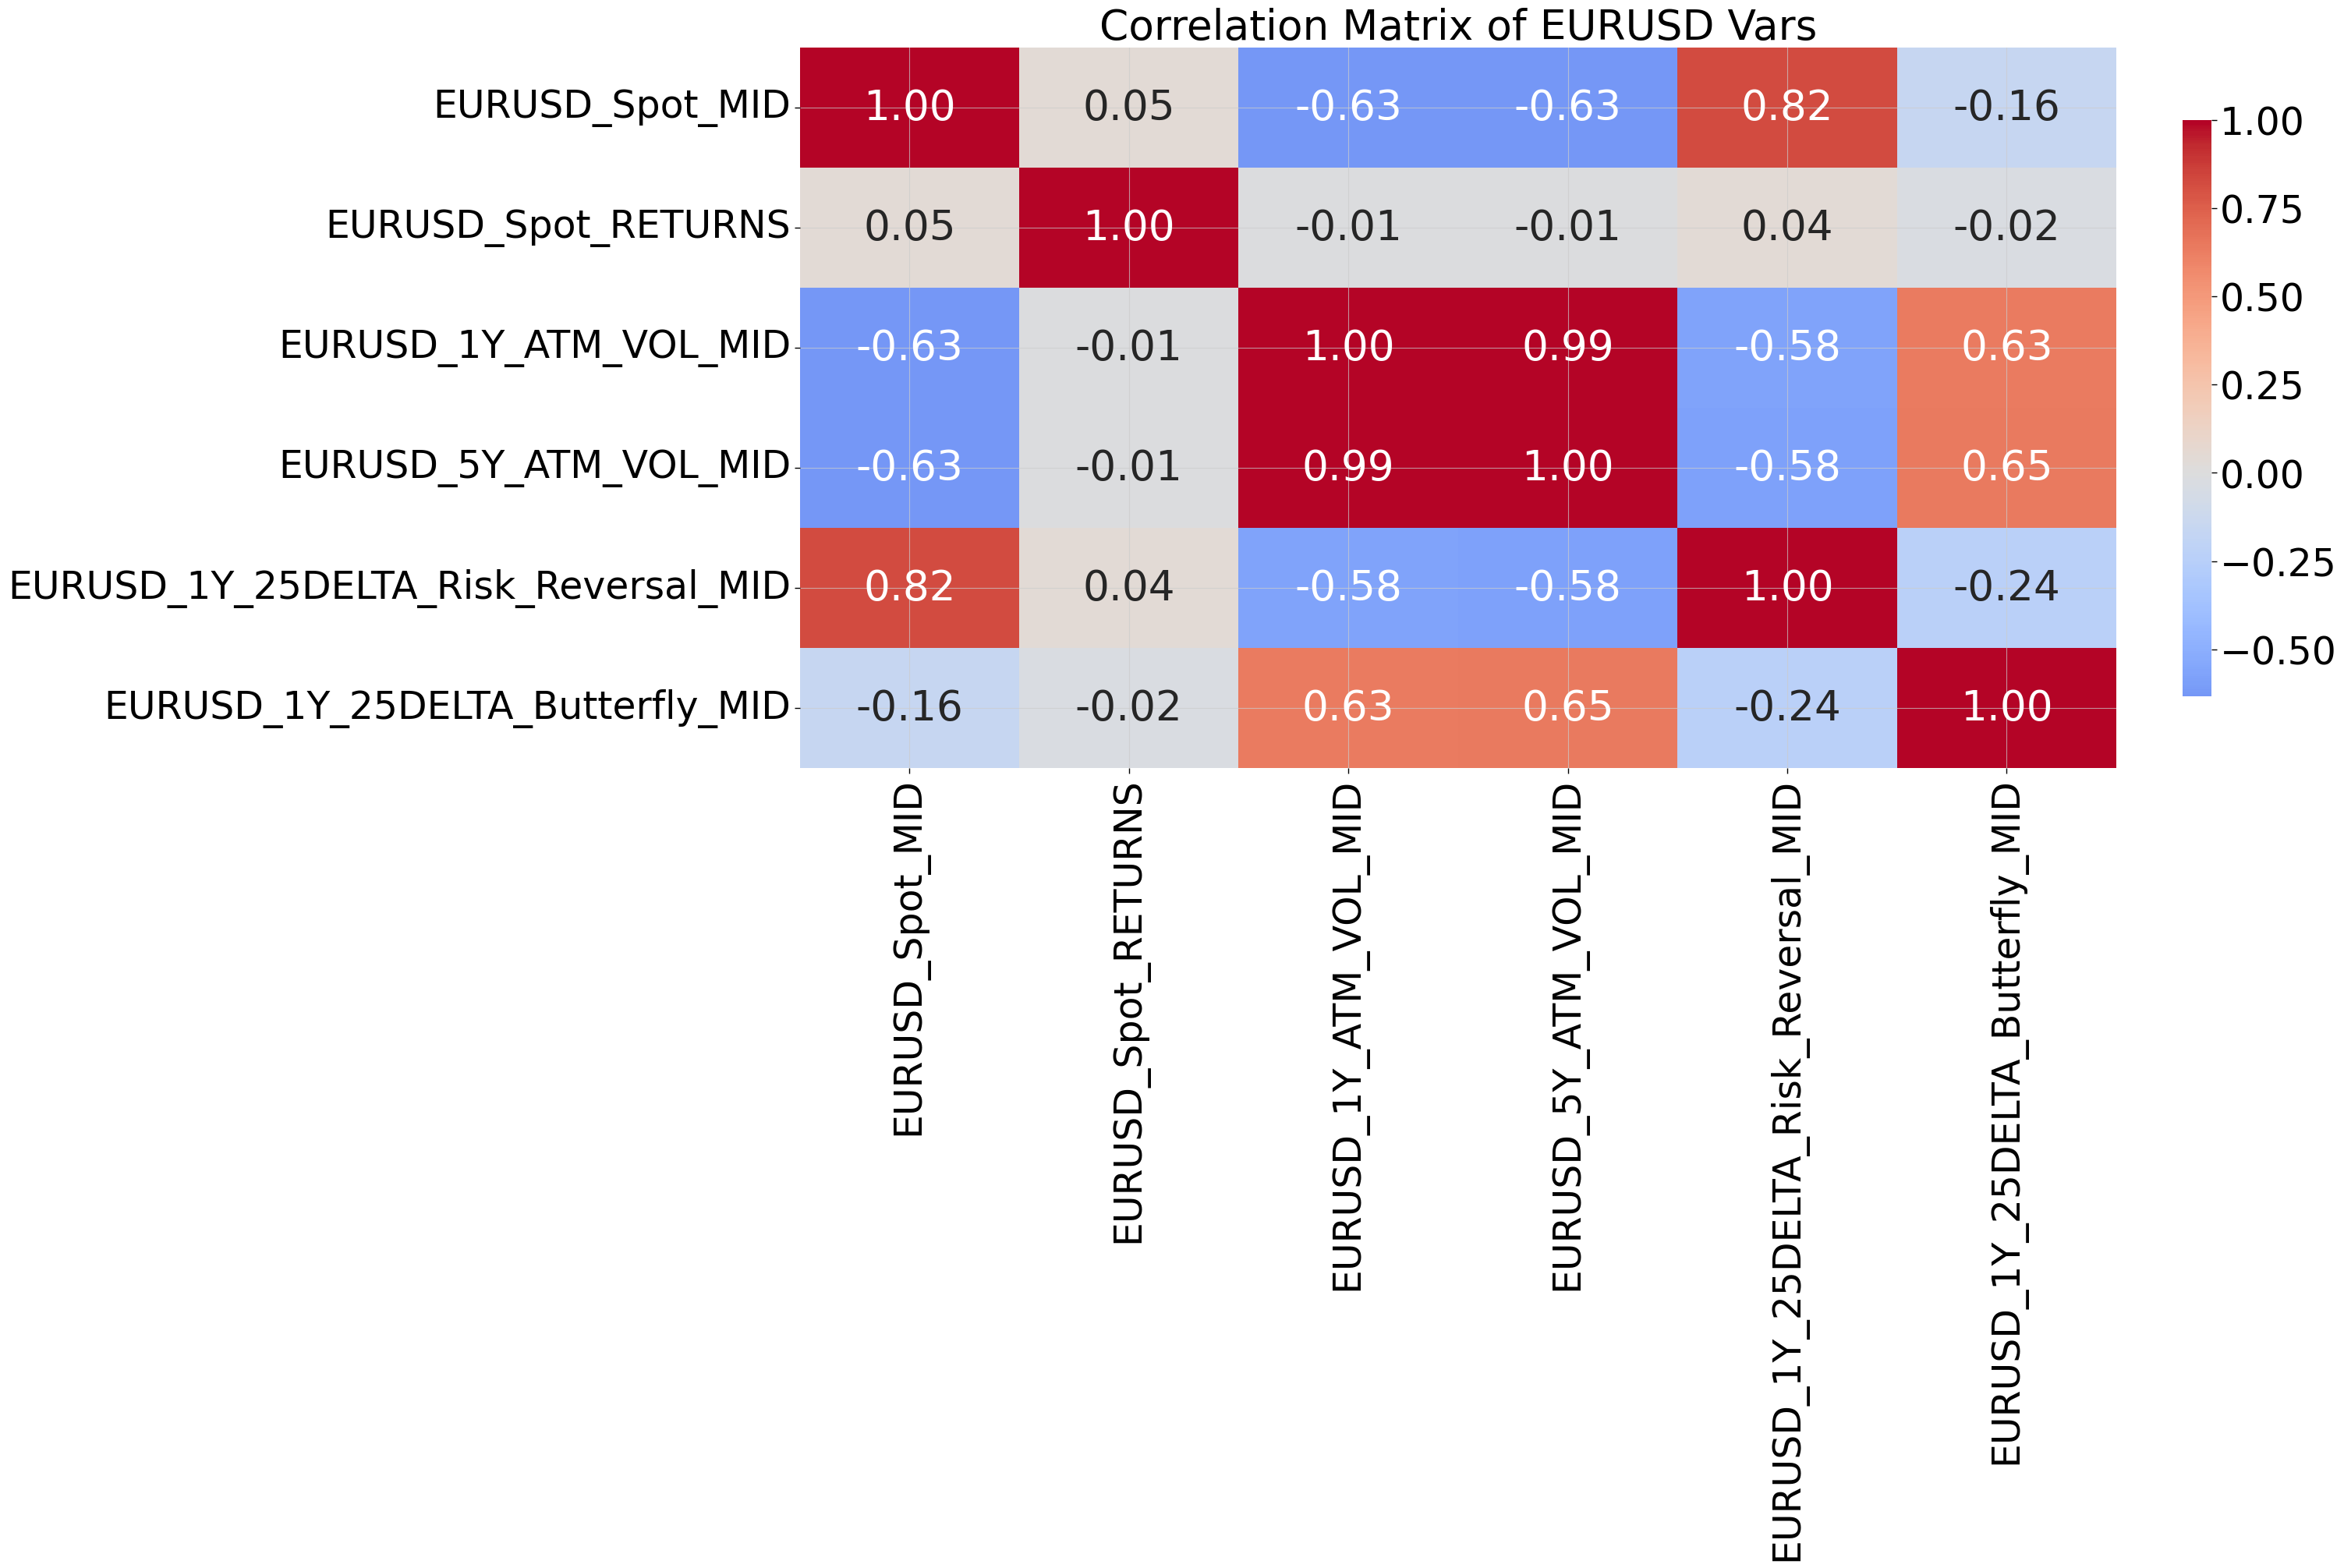

In [22]:
correlation_vars = [
    'EURUSD_Spot_MID',
    'EURUSD_Spot_RETURNS',
    'EURUSD_1Y_ATM_VOL_MID',
    'EURUSD_5Y_ATM_VOL_MID',
    'EURUSD_1Y_25DELTA_Risk_Reversal_MID',
    'EURUSD_1Y_25DELTA_Butterfly_MID',
]


correlation_df = market_df[correlation_vars].corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_df, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0,cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of EURUSD Vars')
plt.show()

In [25]:
# market_df['Date'] = market_df.index
# market_df.reset_index()
market_df.to_csv('processed_data.csv',index=False)